# Actual house price prediction problem

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularization in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal

The model is required to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Approach
1. Importing the various models required for the model building
2. Import and reading the data (train.csv)
3. Analyzing Numerical Features
    - Finding statistical summary of the numerical data
    - Checking the data for outliers
    - Outlier Treatment
    - Finding the correlation of the data
    - Finding and handling missing value in the data
    - Extracting new data from the given data
    - Dropping unrelevant columns as required
    - Correcting the datatype of each column
    - Data Visualization
4. Analyzing Categorical Features
    - Finding and handling of missing values. 
    - Encoding of categorical columns and creating dummy variables. 
    - Data Visualization
    - Dropping Runrelevant features
5. Dividing the  data into Train and Test data
    - Transformation of Target Variable
    - Feature Scaling
6. Primary Feature Selection using RFE
7. Ridge Regression
8. Lasso Regression
9. Comparing model coefficients
10. Model Evaluation
11. Choosing the final model and most significant features. 

In [1]:
# importing all necessary modules which are required for the model. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# reading the data into the dataframe
housing_data = pd.read_csv("train.csv")

In [3]:
# Checking the head of the data
housing_data.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [4]:
# Checking the tail of the data
housing_data.tail(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1440         Bnk    AllPub    Inside       Mod      Crawfor       Norm   
1441         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1442         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1443         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
1444         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
1445         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1446         Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
1447         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1448         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1449         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1451         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1440       Norm     1Fam     2.5Fin            6            7       1922   
1441       Norm   TwnhsE     1Story            6            5       2004   
1442       Norm     1Fam     2Story           10            5       2008   
1443       Norm     1Fam     1.5Unf            6            6       1916   
1444       Norm     1Fam     1Story            7            5       2004   
1445       Norm     1Fam     SFoyer            6            5       1966   
1446       Norm     1Fam     1Story            5            7       1962   
1447       Norm     1Fam     2Story            8            5       1995   
1448       Norm     1Fam     2Story            4            7       1910   
1449       Norm    Twnhs     SFoy

In [5]:
# Checking the shape of the data
housing_data.shape

(1460, 81)

In [6]:
# Checking the various type of datatypes present in the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# using the describe function of the data to know more about the data
housing_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
# Separating the Numerical and Categorical features for analysis
numerical_df = housing_data.select_dtypes(include= ['int64','float64'])
numerical = numerical_df.columns.values.tolist()
train_ID = housing_data[numerical[0]]
numerical = numerical[2:]
categorical_df = housing_data.select_dtypes(include=['object'])
categorical = categorical_df.columns.values.tolist()

# Numerical Features Analysis

In [9]:
# Checking for null values in the numerical columns
(housing_data[numerical].isnull().sum()/housing_data.shape[0])*100

LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
dtype: float64

As it can be seen that two numerical features have null variables. These features are LotFrontage, GarageYrBlt and MasVnrArea having 17.739726 % , 5.547945% and 0.547945%  null values respectively. Now working on those null values

In [10]:
housing_data[housing_data["LotFrontage"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
50      51          60       RL          NaN    13869   Pave   NaN      IR2   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
100    101          20       RL          NaN    10603   Pave   NaN      IR1   
104    105          50       RM          NaN     7758   Pave   NaN      Reg   
111    112          80       RL          NaN     7750   Pave   NaN      IR1   
113    114          20       RL          NaN    21000   Pave   NaN      Reg   
116    117          20       RL          NaN    11616   Pave   NaN      Reg   
120    121          80       RL          NaN    21453   Pave   NaN      IR1   
126    127         120       RL          NaN     4928   Pave   NaN      IR1   
131    132          60       RL          NaN    12224   Pave   NaN      IR1   
133    134          20       RL          NaN     6853   Pave   NaN      IR1   
136    137          20       RL          NaN    10355   Pave   NaN      IR1   
147    148          60       RL          NaN     9505   Pave   NaN      IR1   
149    150          50       RM          NaN     6240   Pave   NaN      Reg   
152    153          60       RL          NaN    14803   Pave   NaN      IR1   
153    154          20       RL          NaN    13500   Pave   NaN      Reg   
160    161          20       RL          NaN    11120   Pave   NaN      IR1   
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
169    170          20       RL          NaN    16669   Pave   NaN      IR1   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
177    178          50       RL          NaN    13650   Pave   NaN      Reg   
180    181         160       FV          NaN     2117   Pave   NaN      Reg   
186    187          80       RL          NaN     9947   Pave   NaN      IR1   
191    192          60       RL          NaN     7472   Pave   NaN      IR1   
203    204         120       RM          NaN     4438   Pave   NaN      Reg   
207    208          20       RL          NaN    12493   Pave   NaN      IR1   
208    209          60       RL          NaN    14364   Pave   NaN      IR1   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
218    219          50       RL          NaN    15660   Pave   NaN      IR1   
221    222          60       RL          NaN     8068   Pave   NaN      IR1   
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
237    238          60       RL          NaN     9453   Pave   NaN      IR1   
244    245          60       RL          NaN     8880   Pave   NaN      IR1   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
269    270          20       RL          NaN     7917   Pave   NaN      IR1   
287    288          20       RL          NaN     8125   Pave   NaN      IR1   
288    289          20       RL          NaN     9819   Pave   NaN      IR1   
293    294          60       RL          NaN    16659   Pa

In [11]:
# Defining an outlier treatment function so that outliers can be treated properly. 
def outlier_treatment(column_name):
    q1=housing_data[column_name].describe().loc["25%"]
    q3=housing_data[column_name].describe().loc["75%"]
    iqr=q3-q1
    up_bd=q3+1.5*iqr
    lo_bd=q1-1.5*iqr
    housing_data[column_name]=np.where(housing_data[column_name]>up_bd,up_bd,housing_data[column_name])##Capping
    housing_data[column_name]=np.where(housing_data[column_name]<lo_bd,lo_bd,housing_data[column_name])##flooring

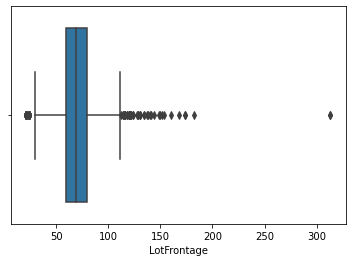

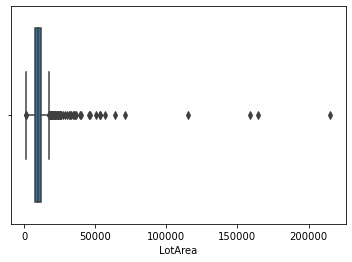

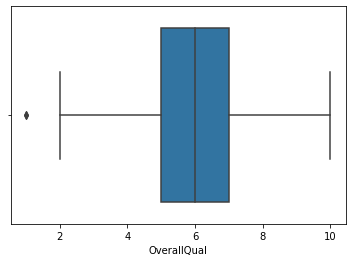

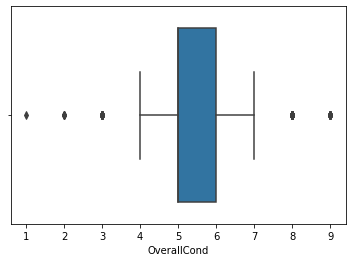

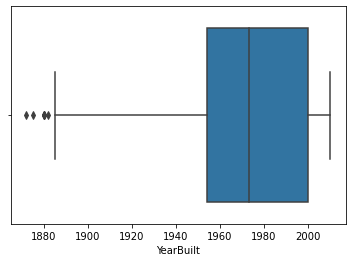

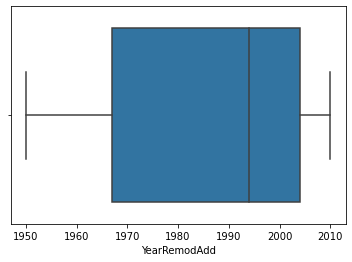

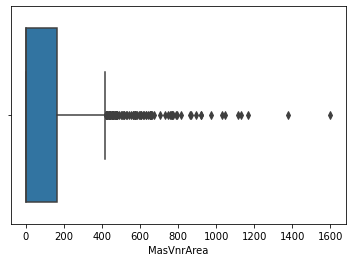

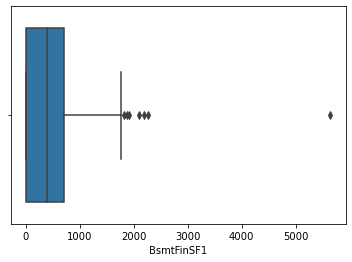

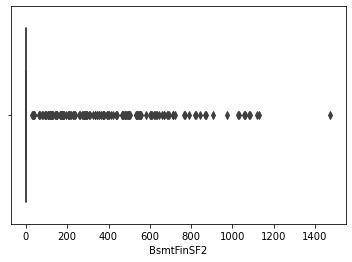

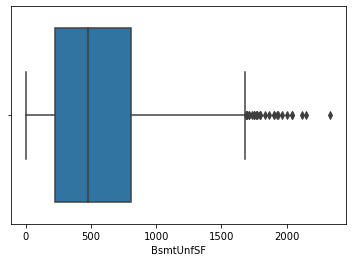

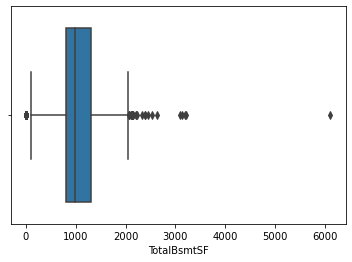

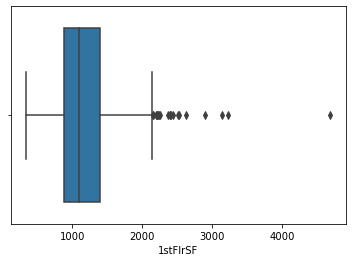

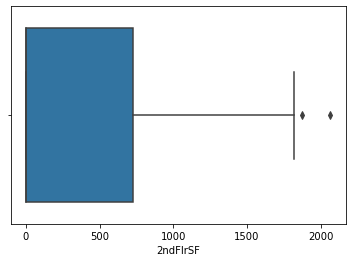

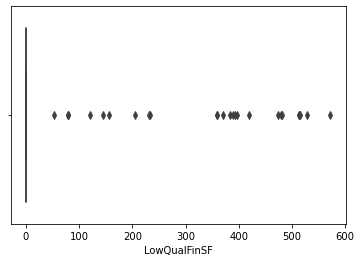

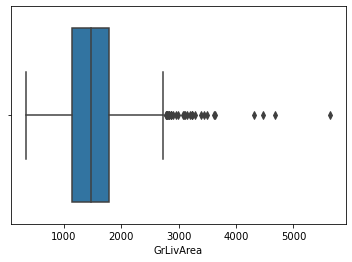

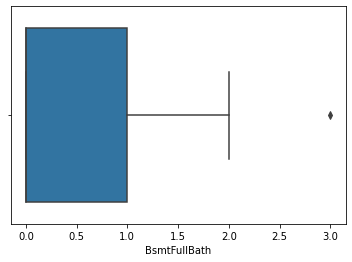

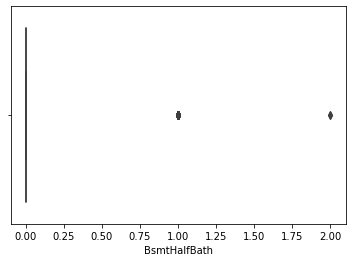

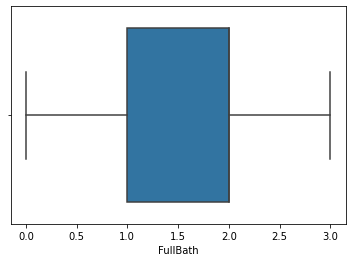

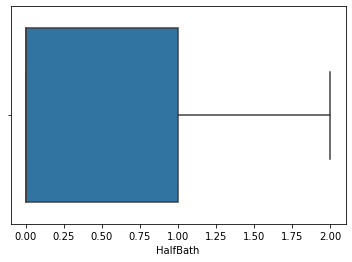

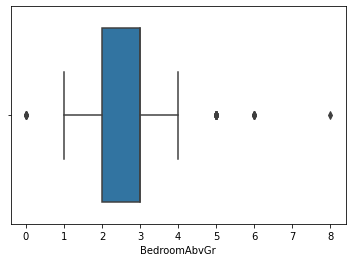

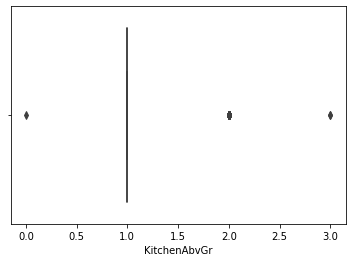

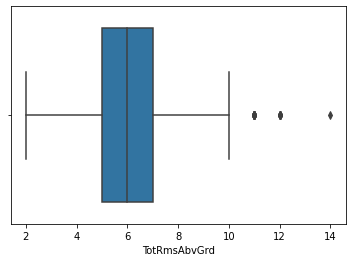

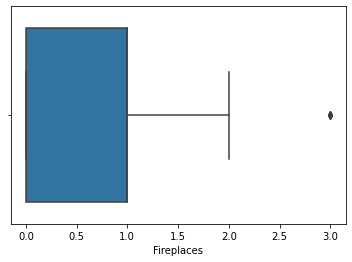

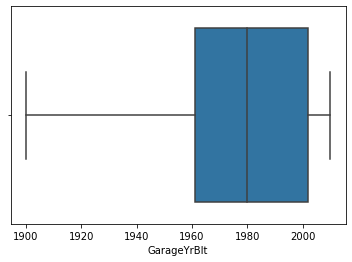

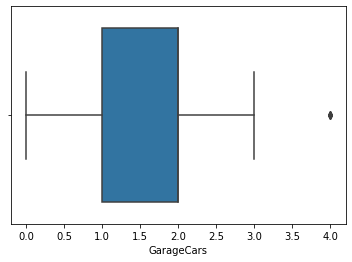

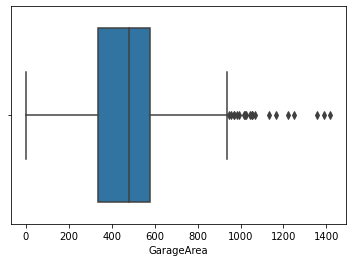

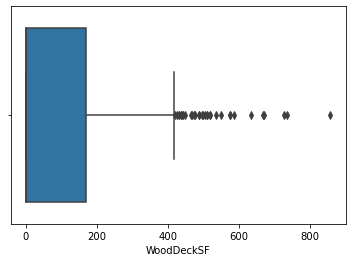

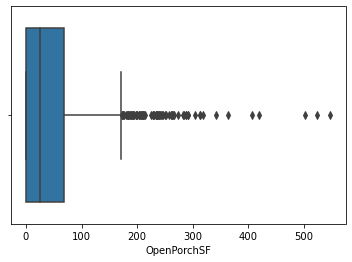

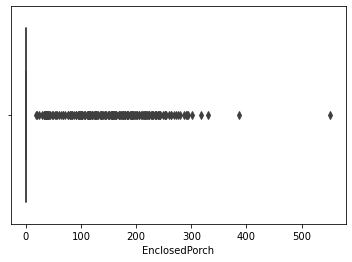

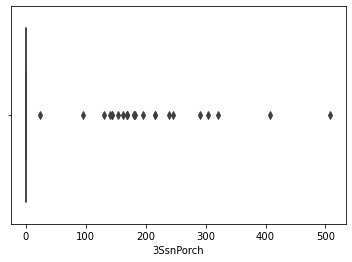

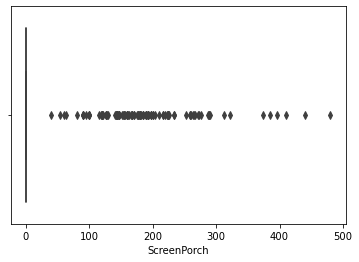

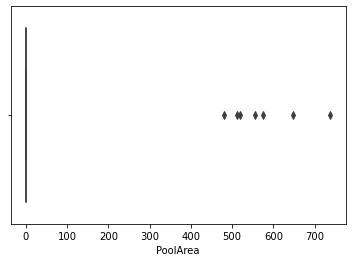

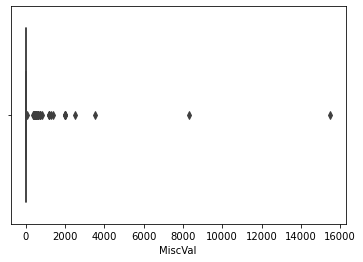

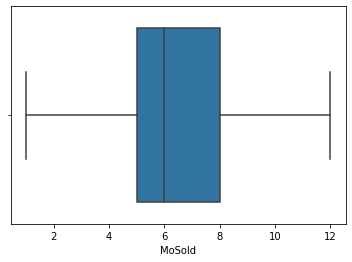

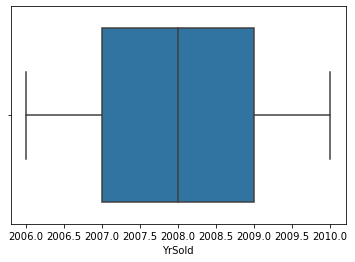

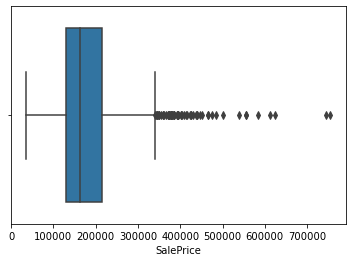

In [12]:
# Checking for outliers in the given data 
for column in numerical:
    sns.boxplot(housing_data[column])
    plt.show()

In [13]:
housing_data[numerical].describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342  1971.267808   
std      24.284752    9981.264932     1.382997     1.112799    30.202904   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411   
std       20.645407   181.066207   456.098091   161.319273   441.866955   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000   
mean       1.046575      6.517808     0.613014  1978.506164     1.767123   
std        0.220338      1.625393     0.644666    24.689725     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1961.000000     1.000000   
50%        1.000000      6.000000     1.000000  1980.000000     2.000000   
75%        1.000000      7.000000     1.000000  2002.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000

In [14]:
for i in numerical:
    outlier_treatment(i)

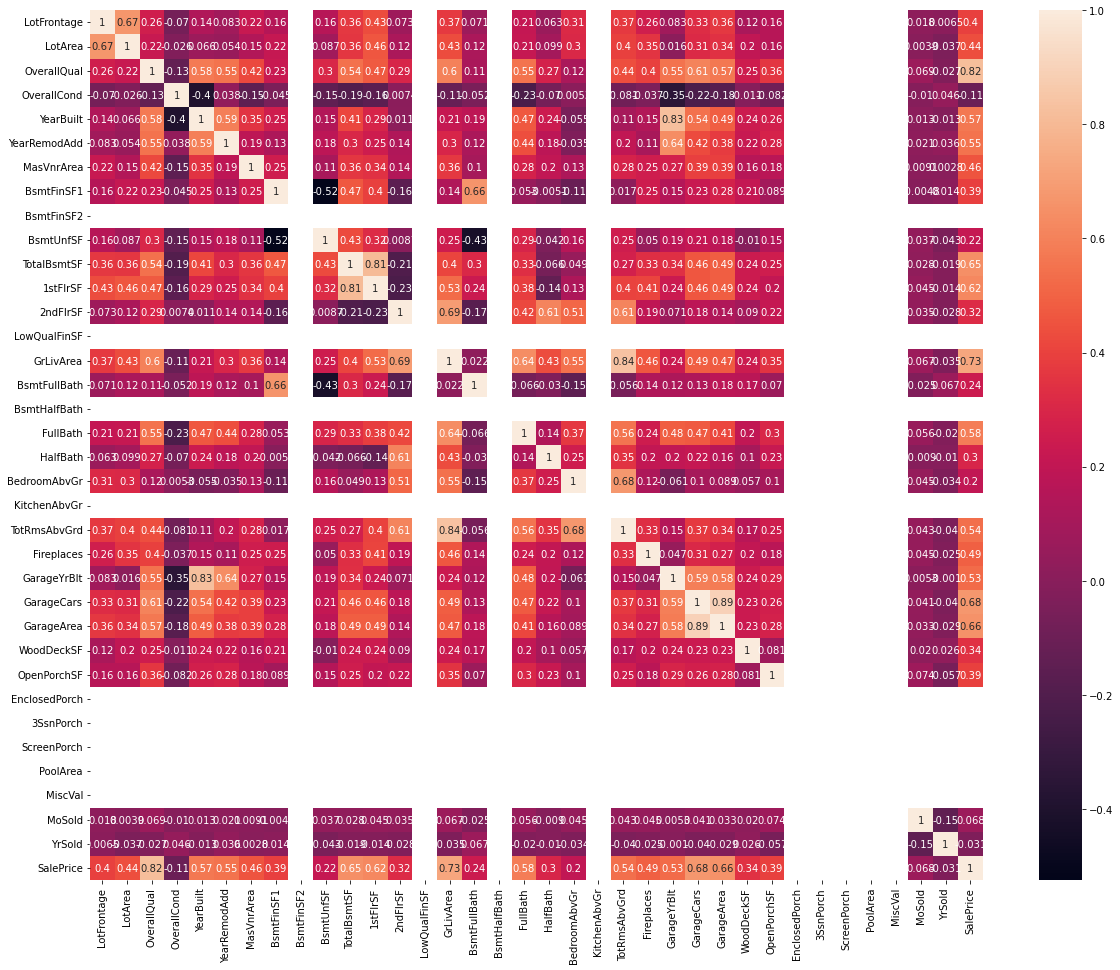

In [15]:
# Finding the correlation between the data
plt.figure(figsize=(20,16))
sns.heatmap(housing_data[numerical].corr(),annot=True)
plt.show()

As it can be seen that BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea and MiscVal have no correlation with the sales. Also it can be seen that there are many variables which have negative correlation with the sales and also each other. 

As it can be seen that there are various values which always have zero as well as it can be seen that there are many cases of high correlation hence working on in the next few commands

In [16]:
# Removing all the data which have all 0 in their rows. 
housing_data = housing_data.drop(["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"], axis = 1)

In [17]:
# Removing all the data which have all 0 in their rows. 
remove_1 = ["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal","SalePrice"]
for i in remove_1:
    numerical.remove(i)

In [18]:
# inputing the median values for all the missing values in the numerical column
for i in numerical:
    housing_data[i] = housing_data[i].fillna(housing_data[i].median())

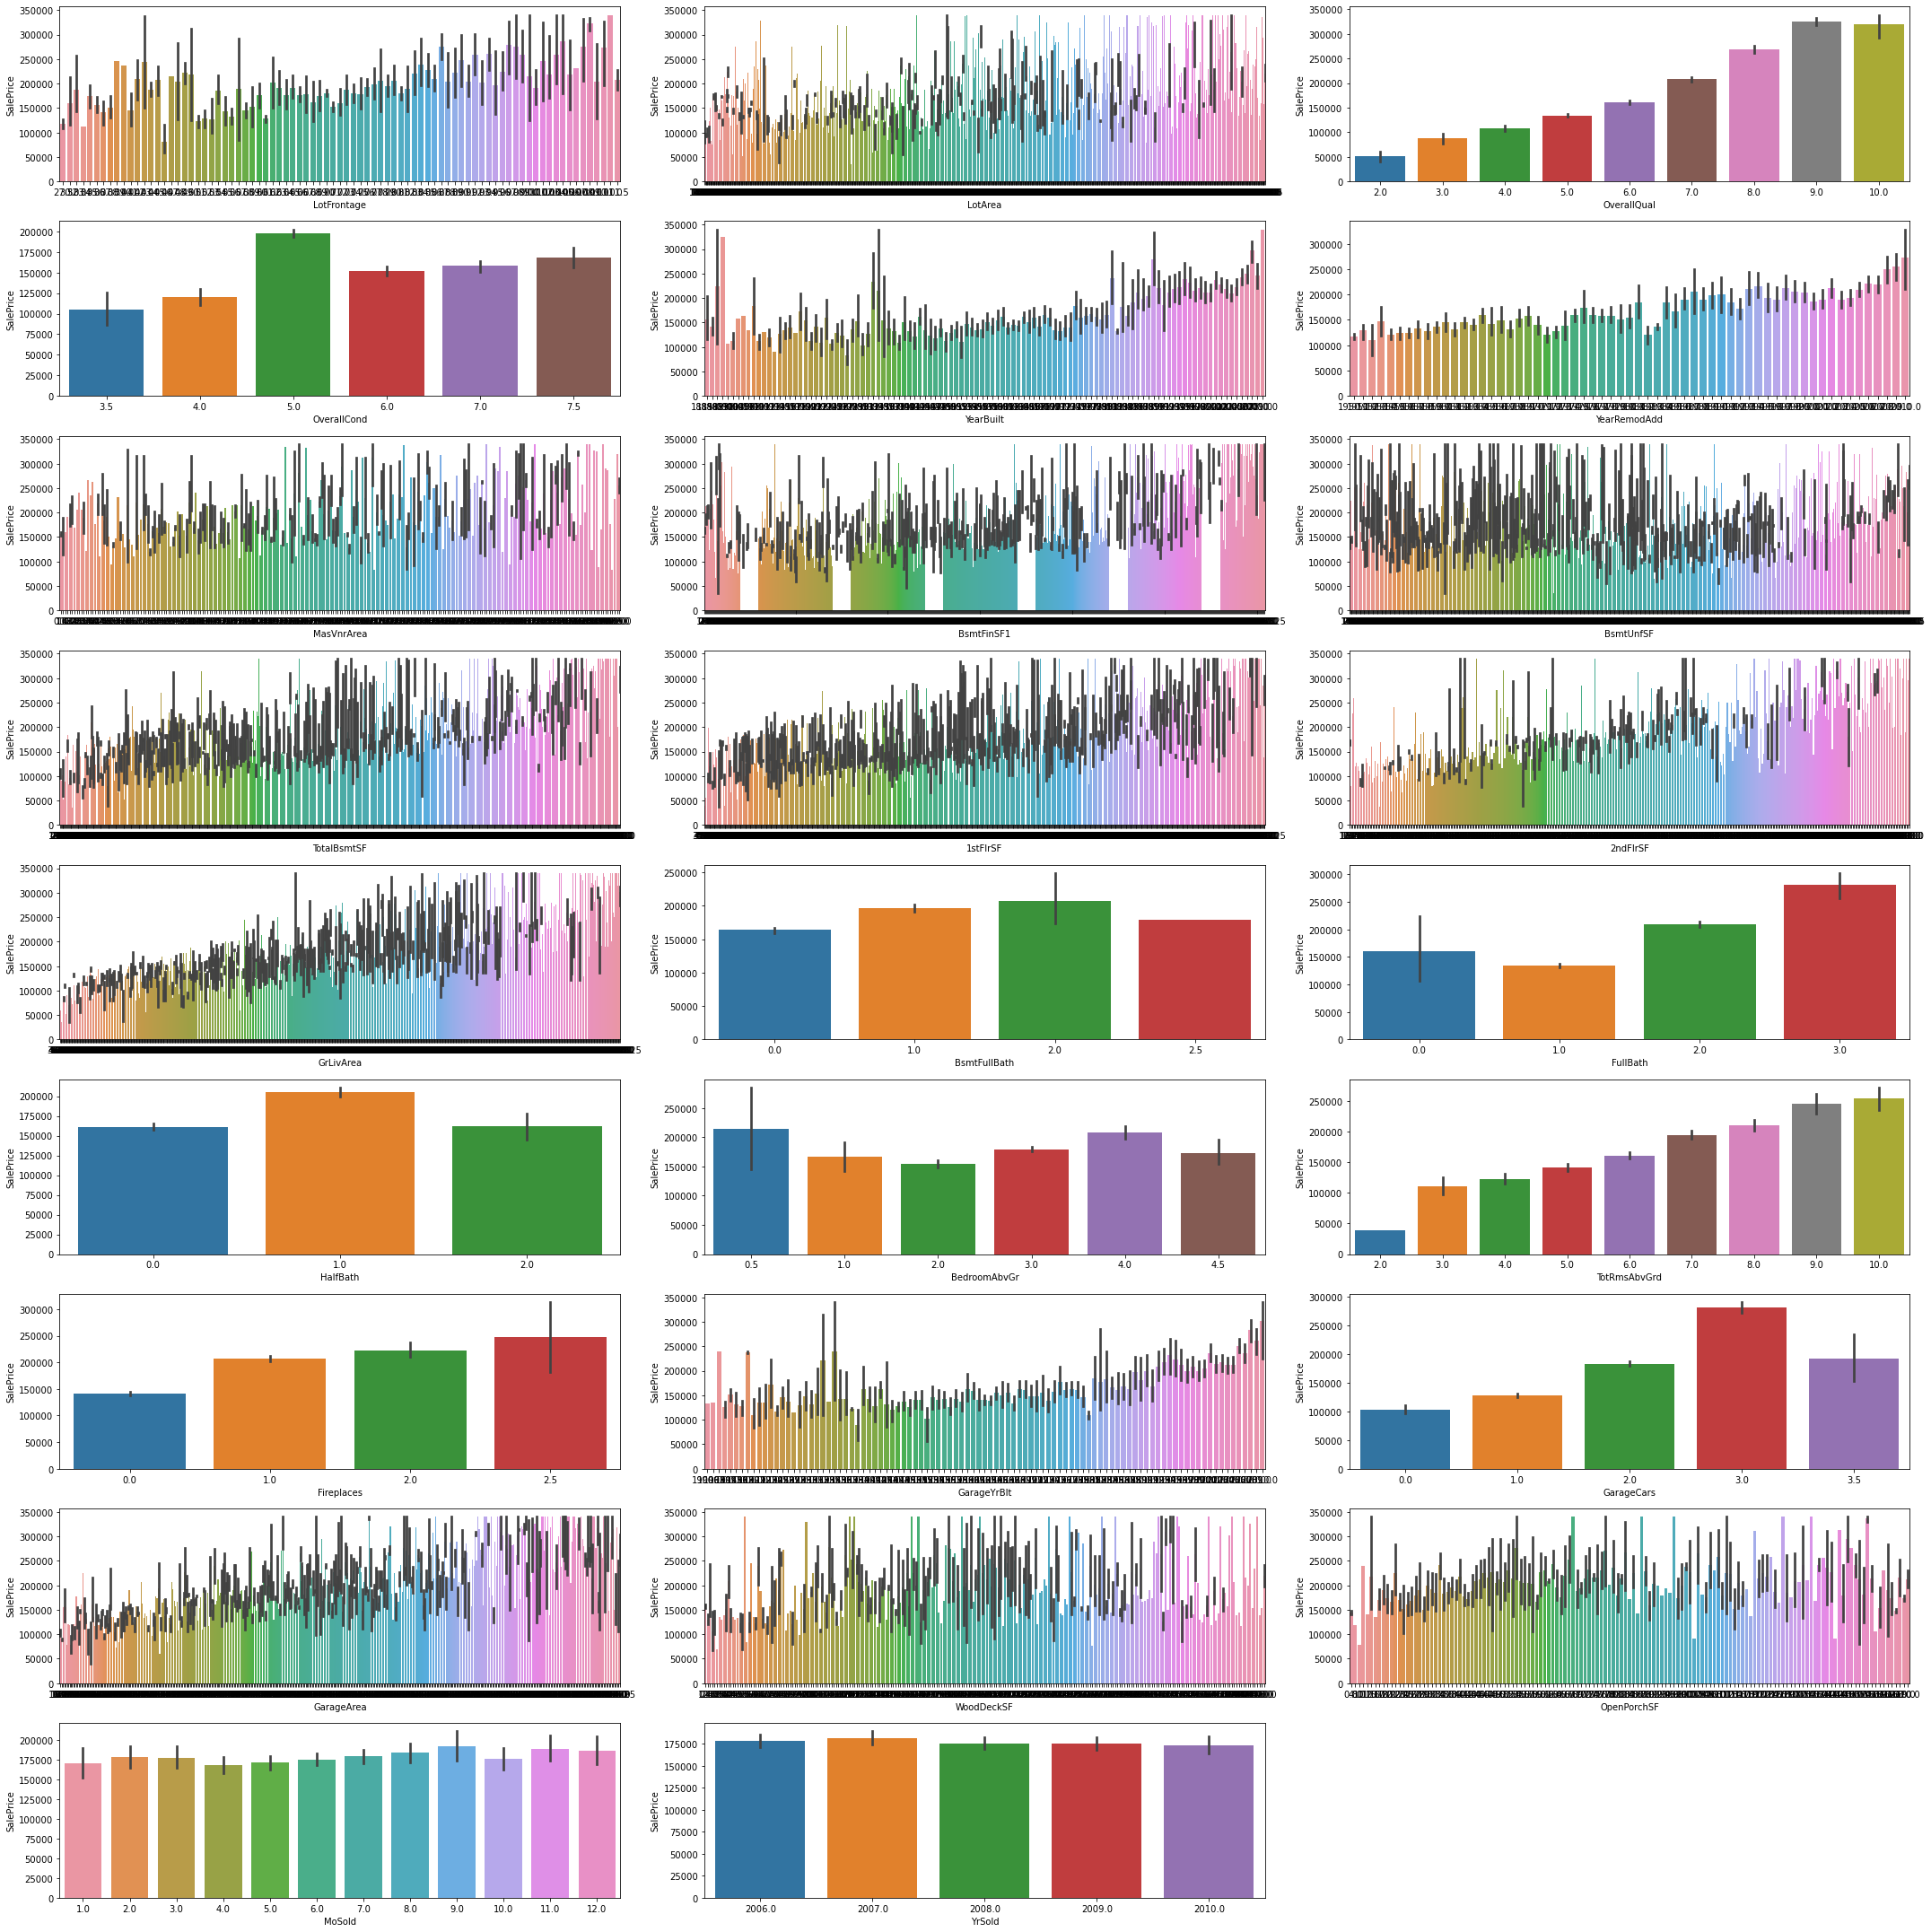

In [19]:
fig=plt.subplots(figsize=(30, 30))

for i, feature in enumerate(numerical):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()

### Insights
- The MSSubClass Vs SalePrice shows clearly that there is not much relation between them from this graph but further analysis is required to know their relationship with each other. Also, the correlation shows that its value is 0.01 hence the chances of relation is low. 
- LotFrontage Vs SalePrice also shows no real relationhip between each other also the correlation shows that the value of their relationship is around 0.16.  
- OverallQual and TotRmsAbvGrd shows clear linear relation with the SalePrice. It can be seen that the with the increase in OverallQual and TotRmsAbvGrd, the SalePrice also increases hence their relationship can clearly be seen. 
- It has been seen that FullBath with the value 3.0 has the highest sales price and this relationship is clear. 
- The HalfBath and SalePrice relation shows that when the value of HalfBath is 1.0, the SalePrice is the highest. 
- The FirePlaces and SalePrice relation clearly shows that higher the value of FirePlaces, the SalePrice is increases considerably. 
- GarageCars and SalePrice clearly shows that value of 3.0 of the GarageCars has the highest Saleprice. 
- YrSold and SalePrice shows not much relationship as values are mostly same. 
- All other features require more analysis which will done later.

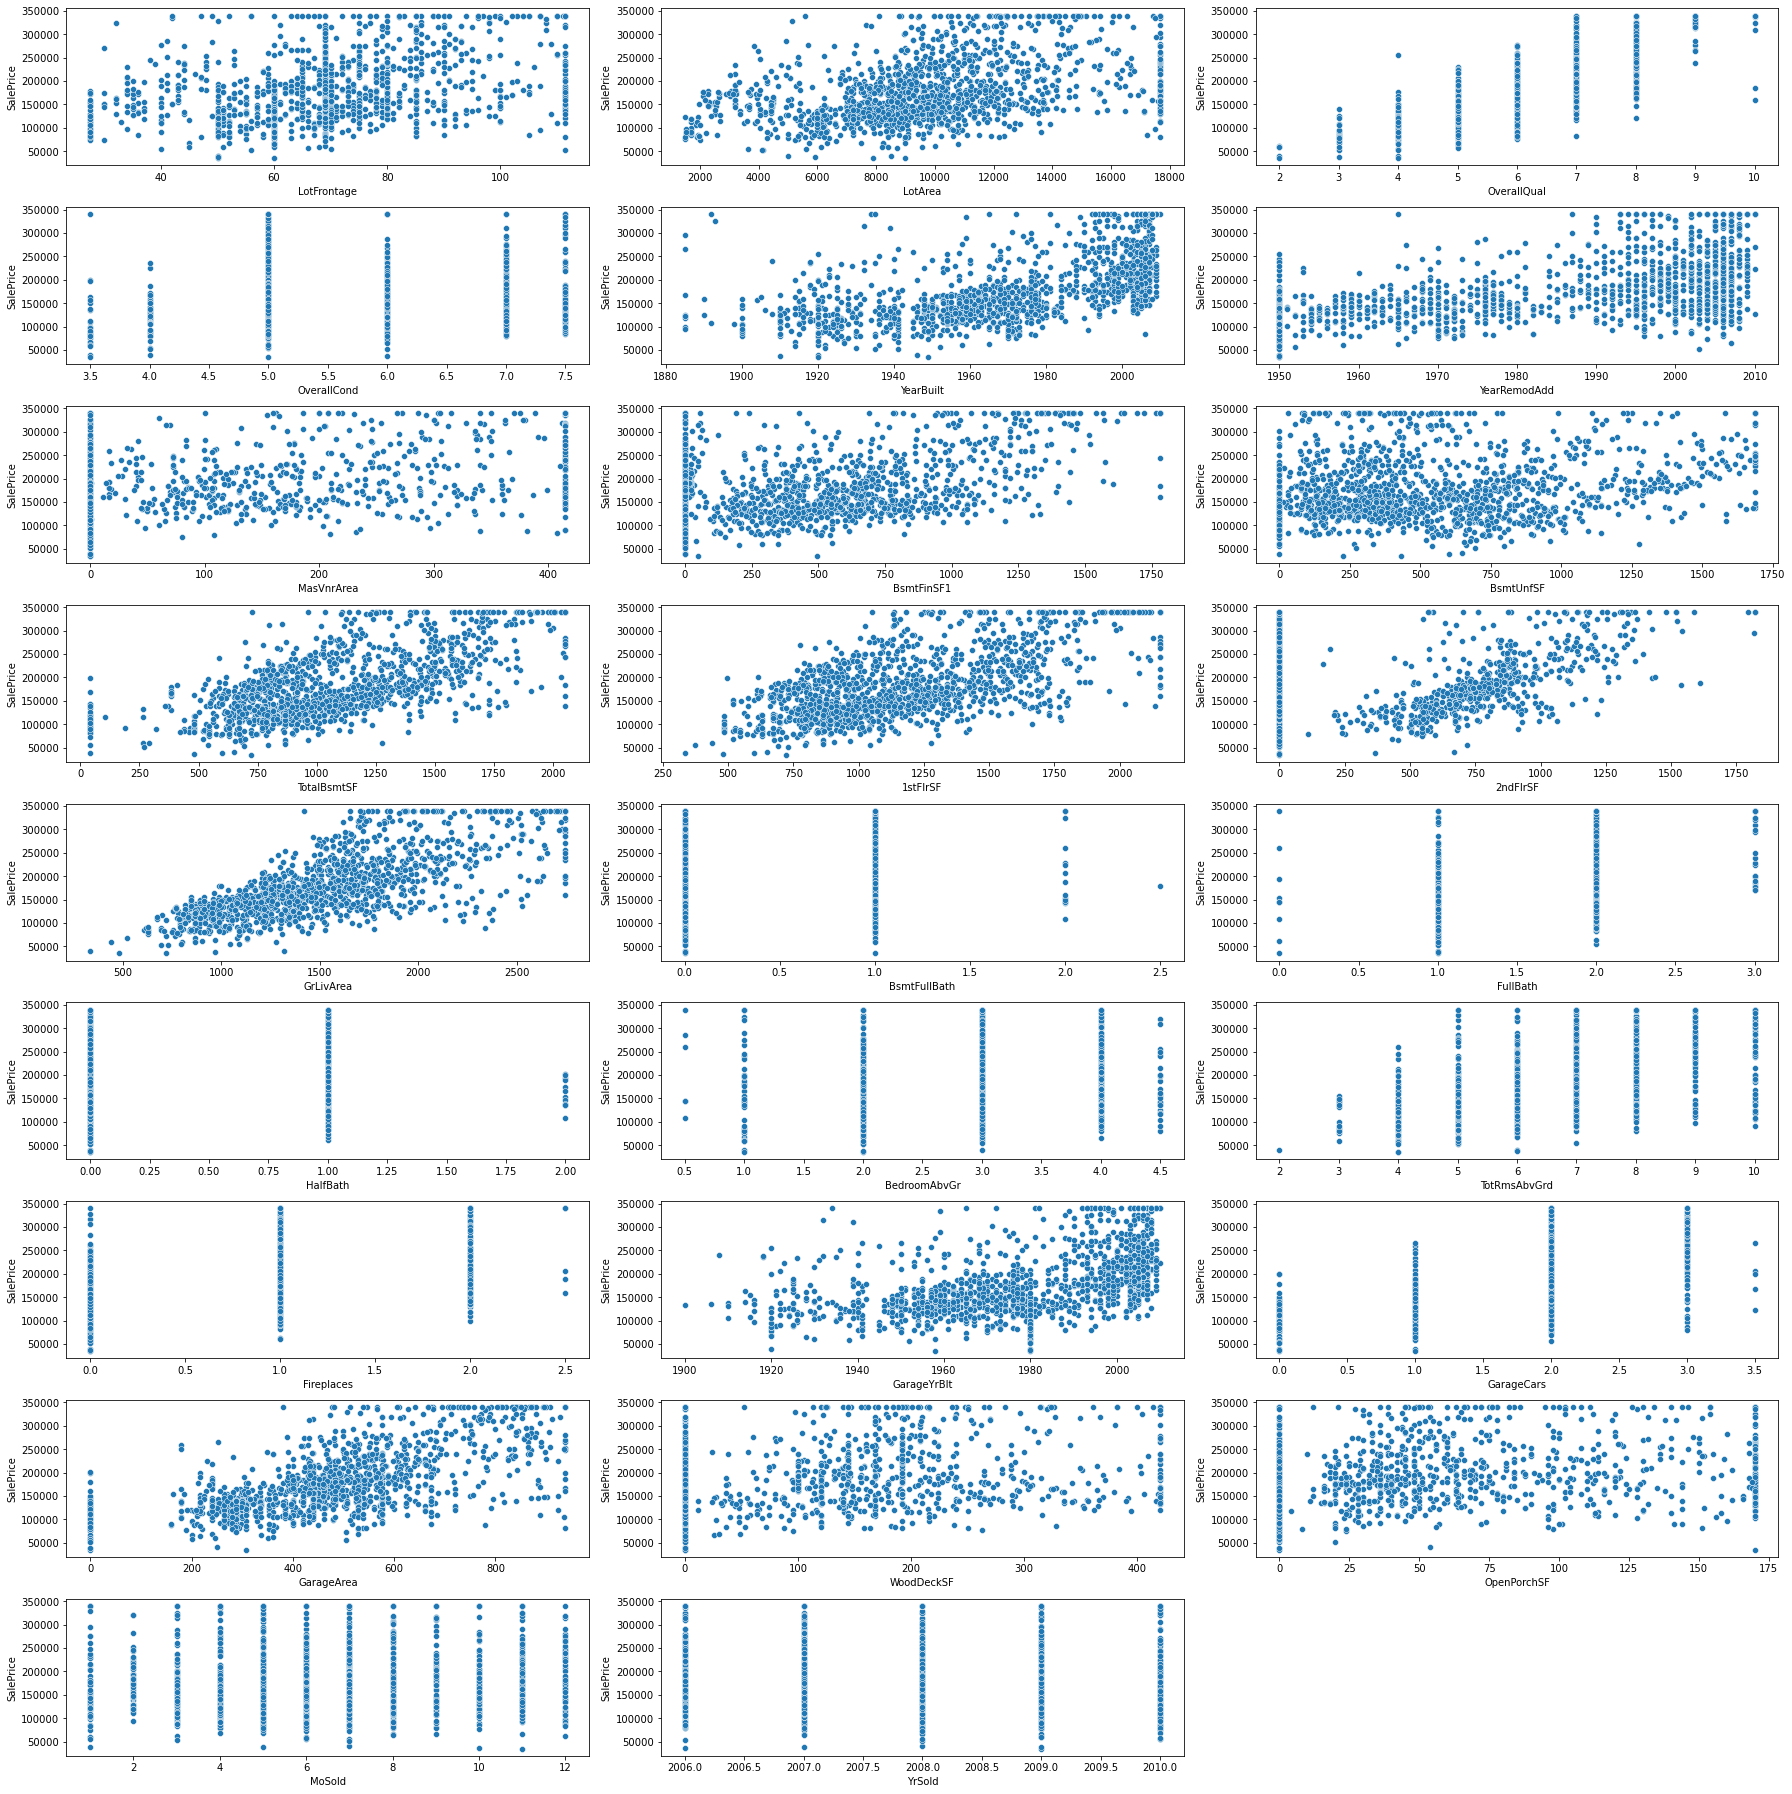

In [20]:
fig=plt.subplots(figsize=(25, 25))

for i, feature in enumerate(numerical):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()

### Insights
- The MSSubClass Vs SalePrice shows clearly that there is not much relation between them from this graph but further analysis is required to know their relationship with each other. Also, the correlation shows that its value is 0.01 hence the chances of relation is low. 
- LotFrontage Vs SalePrice also shows no real relationhip between each other also the correlation shows that the value of their relationship is around 0.16.  
- OverallQual and TotRmsAbvGrd shows clear linear relation with the SalePrice. It can be seen that the with the increase in OverallQual and TotRmsAbvGrd, the SalePrice also increases hence their relationship can clearly be seen. 
- It has been seen that FullBath with the value 3.0 has the highest sales price and this relationship is clear. 
- The HalfBath and SalePrice relation shows that when the value of HalfBath is 1.0, the SalePrice is the highest. 
- The FirePlaces and SalePrice relation clearly shows that higher the value of FirePlaces, the SalePrice is increases considerably. 
- GarageCars and SalePrice clearly shows that value of 3.0 of the GarageCars has the highest Saleprice. 
- YrSold and SalePrice shows not much relationship as values are mostly same. 
- All other features require more analysis which will done later.

# Categorical Features Analysis

In [21]:
# Checking for null values in the numerical columns
(housing_data[categorical].isnull().sum()/housing_data.shape[0])*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [22]:
# These features which have NA means not available and their data is not missing. Hence Imputing it wiith "Not_applicable"
NA_columns_meaning = ["BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", 
                      "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1"]
for i in NA_columns_meaning:
    housing_data[i].fillna("Not_applicable", inplace = True)

In [23]:
# Checking for null values in the numerical columns
(housing_data[categorical].isnull().sum()/housing_data.shape[0])*100

MSZoning         0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.000000
GarageType       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageCond       0.000000
PavedDrive       0.000000
PoolQC      

In [24]:
# Now imputing the rest with the mode value so that most of the data is retained. 
Mode_value_imputation = ["Electrical", "MasVnrType"]
for i in Mode_value_imputation:
    housing_data[i].fillna((housing_data[i].mode()[0]), inplace = True)

In [25]:
# Checking for null values in the numerical columns
(housing_data[categorical].isnull().sum()/housing_data.shape[0])*100

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

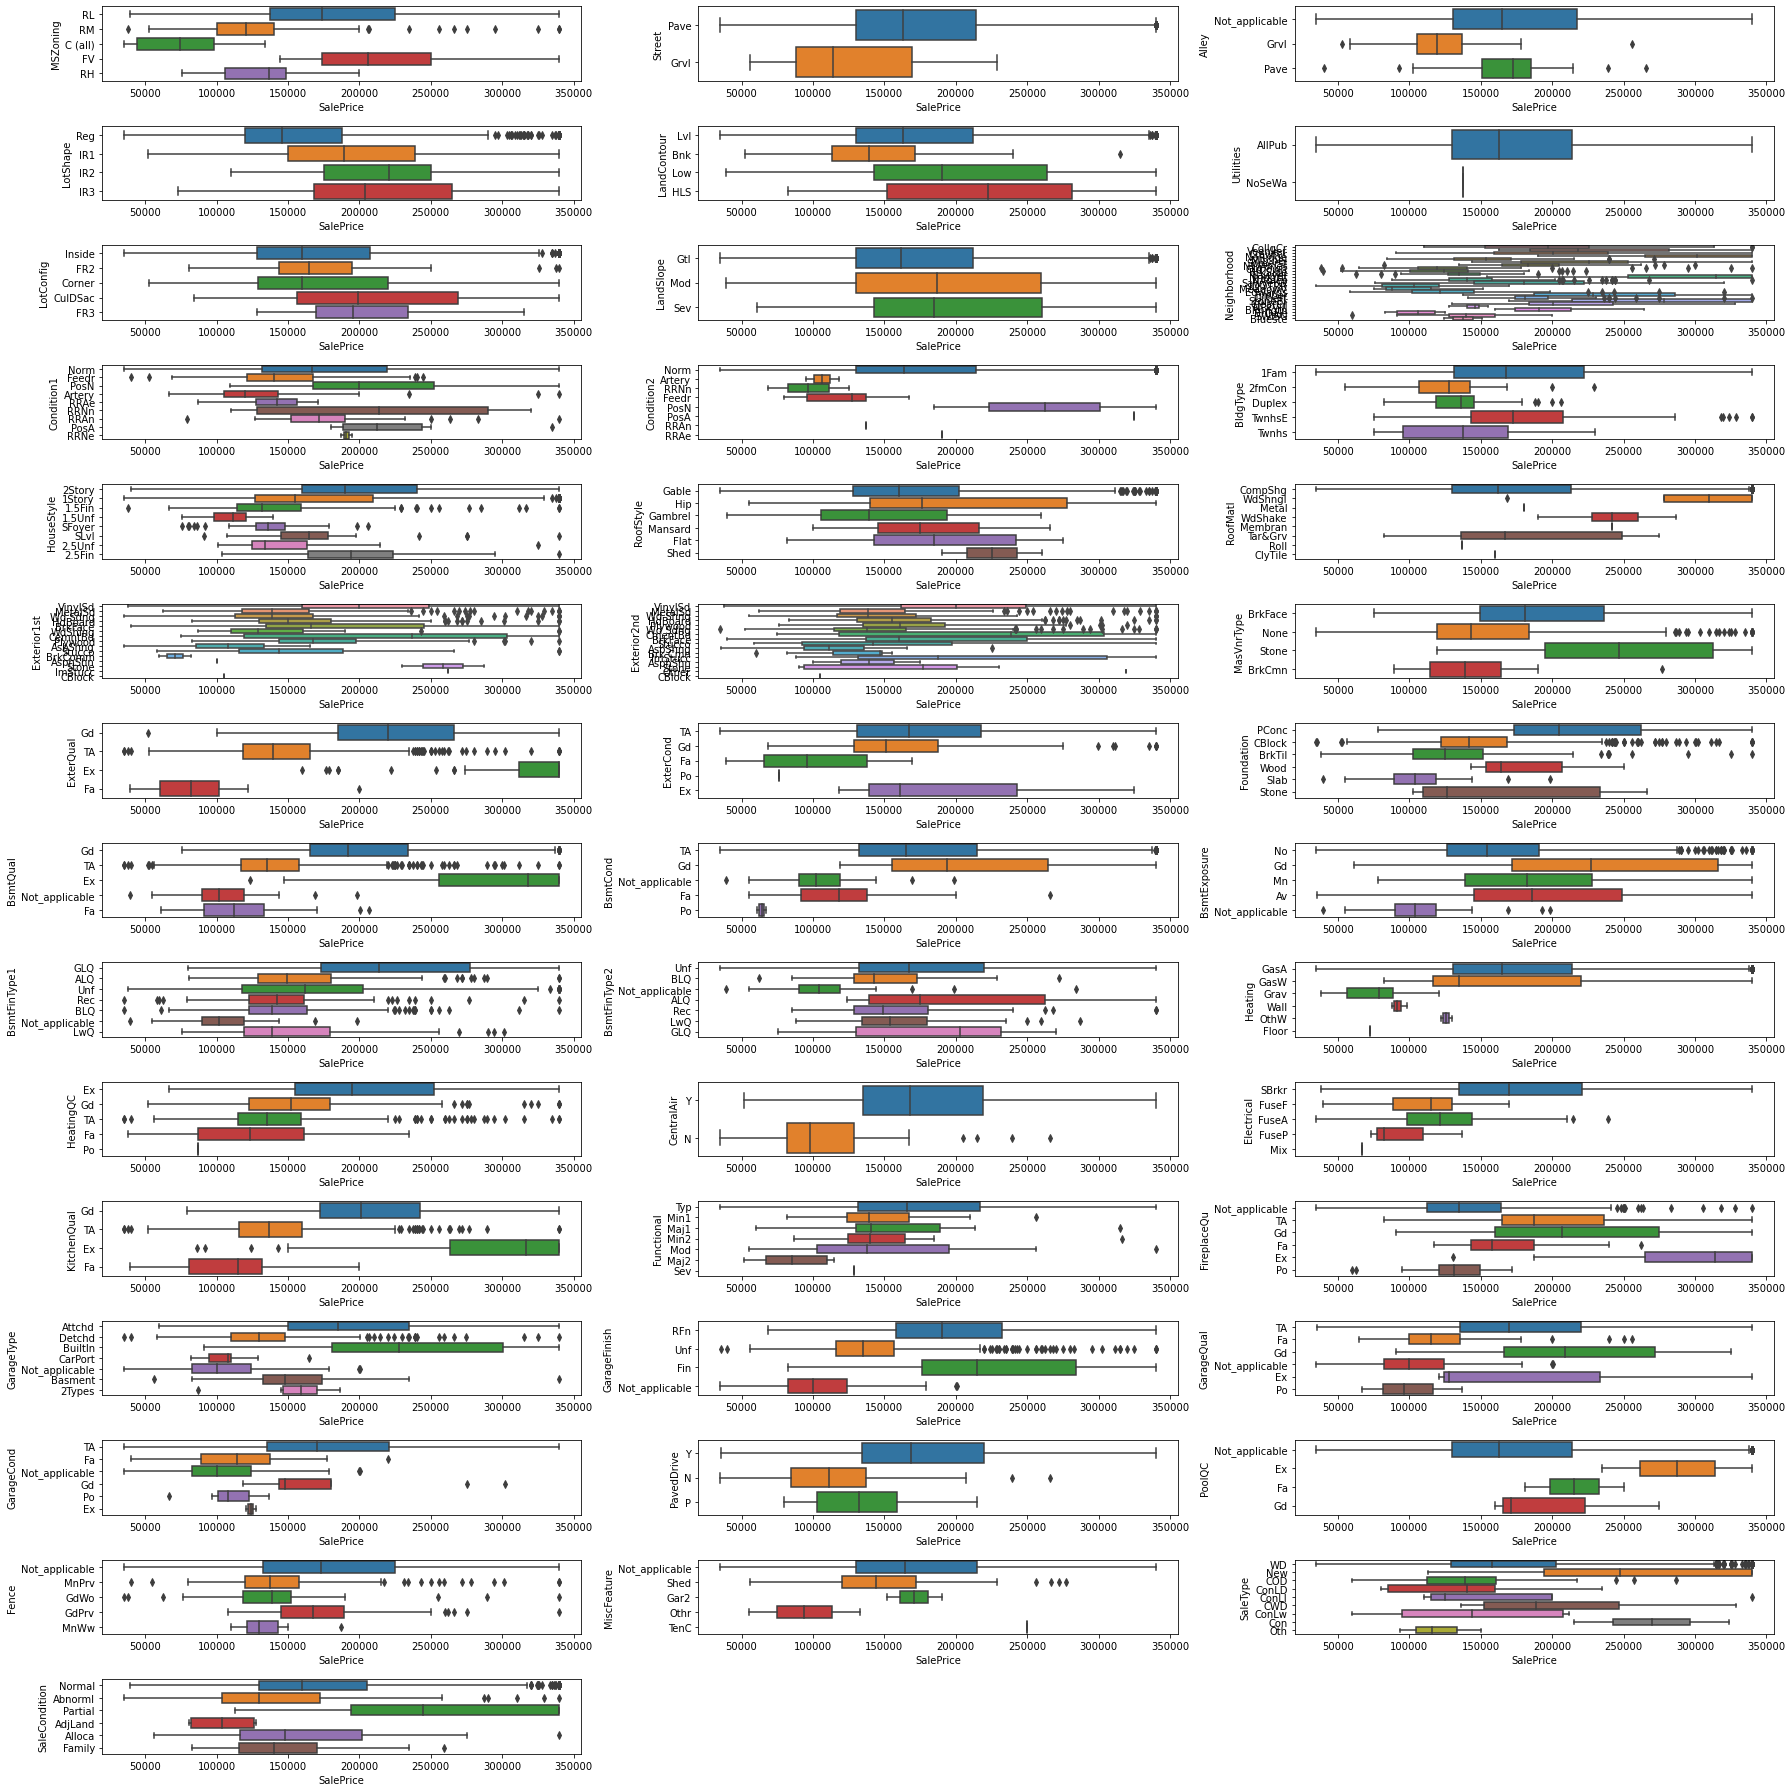

In [26]:
fig=plt.subplots(figsize=(25, 25))

for i, feature in enumerate(categorical):
    plt.subplot(15, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(housing_data['SalePrice'], housing_data[feature])
    plt.tight_layout()

### Insights
- It has been seen that slightly irregular LotShape have the highest SalePrice
- It has been seen that most of the houses in the dataset have all the public utilities
- It has been seen that houses at severe land slope have lowest SalePrice
- It has been seen that houses having excellent heating quality and kitchen quality have the highest SalePrice
- It has been seen that houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- It has been seen that SalePrice range in largest for houses with average fireplace quality
- It has been seen that 2 storied houses have the highest SalePrice
- It has been seen that houses with Excellent quality of material on the exterior have the highest SalePrice
- it has been seen that houses with excellent quality basement have the highest SalePrice
- It has been seen that housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- It has been seen that a lot of houses have unfinished basment or no basement (label = Not_applicable)
- It has been seen that houses with Excellent condition of material on the exterior have the highest SalePrice
- It has been seen that SalePrice is highest where garage is finished.
- it has been seen that the range of SalePrice is widest for Typical/Average Garage quality and condition.
- it has been seen that there are very few houses with excellect condition of garage.

In [27]:
# creating dummy variables
dummy_dataframe = pd.get_dummies(housing_data[categorical], drop_first=True)

In [28]:
# Adding the dummy variables to the original dataframe
housing_data = pd.concat([housing_data,dummy_dataframe],axis=1)

# Dropping the redundant columns
housing_data = housing_data.drop(categorical,axis=1)

In [29]:
housing_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0   8450.0          7.0          5.0     2003.0   
1   2          20         80.0   9600.0          6.0          7.5     1976.0   
2   3          60         68.0  11250.0          7.0          5.0     2001.0   
3   4          70         60.0   9550.0          7.0          5.0     1915.0   
4   5          60         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0        2003.0       196.0       706.0      150.0        856.0     856.0   
1        1976.0         0.0       978.0      284.0       1262.0    1262.0   
2        2002.0       162.0       486.0      434.0        920.0     920.0   
3        1970.0         0.0       216.0      540.0        756.0     961.0   
4        2000.0       350.0       655.0      490.0       1145.0    1145.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     854.0     1710.0           1.0       2.0       1.0           3.0   
1       0.0     1262.0           0.0       2.0       0.0           3.0   
2     866.0     1786.0           1.0       2.0       1.0           3.0   
3     756.0     1717.0           1.0       1.0       0.0           3.0   
4    1053.0     2198.0           1.0       2.0       1.0           4.0   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0           8.0         0.0       2003.0         2.0       548.0         0.0   
1           6.0         1.0       1976.0         2.0       460.0       298.0   
2           6.0         1.0       2001.0         2.0       608.0         0.0   
3           7.0         1.0       1998.0         3.0       642.0         0.0   
4           9.0         1.0       2000.0         3.0       836.0       192.0   

   OpenPorchSF  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
0         61.0     2.0  2008.0   208500.0            0            0   
1          0.0     5.0  2007.0   181500.0            0            0   
2         42.0     9.0  2008.0   223500.0            0            0   
3         35.0     2.0  2006.0   140000.0            0            0   
4         84.0    12.0  2008.0   250000.0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Not_applicable  Alley_Pave  \
0            1            0            1                     1           0   
1            1            0            1                     1           0   
2            1            0            1                     1           0   
3            1            0            1                     1           0   
4            1            0            1                     1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 

# Splitting dataframe and preparing data for analysis

In [30]:
# Creating Y value as sales
y = housing_data.pop("SalePrice")
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [31]:
# Creating X variables as all the other columns
X = housing_data
X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0   8450.0          7.0          5.0     2003.0   
1   2          20         80.0   9600.0          6.0          7.5     1976.0   
2   3          60         68.0  11250.0          7.0          5.0     2001.0   
3   4          70         60.0   9550.0          7.0          5.0     1915.0   
4   5          60         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0        2003.0       196.0       706.0      150.0        856.0     856.0   
1        1976.0         0.0       978.0      284.0       1262.0    1262.0   
2        2002.0       162.0       486.0      434.0        920.0     920.0   
3        1970.0         0.0       216.0      540.0        756.0     961.0   
4        2000.0       350.0       655.0      490.0       1145.0    1145.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     854.0     1710.0           1.0       2.0       1.0           3.0   
1       0.0     1262.0           0.0       2.0       0.0           3.0   
2     866.0     1786.0           1.0       2.0       1.0           3.0   
3     756.0     1717.0           1.0       1.0       0.0           3.0   
4    1053.0     2198.0           1.0       2.0       1.0           4.0   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0           8.0         0.0       2003.0         2.0       548.0         0.0   
1           6.0         1.0       1976.0         2.0       460.0       298.0   
2           6.0         1.0       2001.0         2.0       608.0         0.0   
3           7.0         1.0       1998.0         3.0       642.0         0.0   
4           9.0         1.0       2000.0         3.0       836.0       192.0   

   OpenPorchSF  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         61.0     2.0  2008.0            0            0            1   
1          0.0     5.0  2007.0            0            0            1   
2         42.0     9.0  2008.0            0            0            1   
3         35.0     2.0  2006.0            0            0            1   
4         84.0    12.0  2008.0            0            0            1   

   MSZoning_RM  Street_Pave  Alley_Not_applicable  Alley_Pave  LotShape_IR2  \
0            0            1                     1           0             0   
1            0            1                     1           0             0   
2            0            1                     1           0             0   
3            0            1                     1           0             0   
4            0            1                     1           0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0               

In [32]:
# removing the Id Variables from X since it has no use in the analysis. 
X_ID = housing_data.pop("Id")

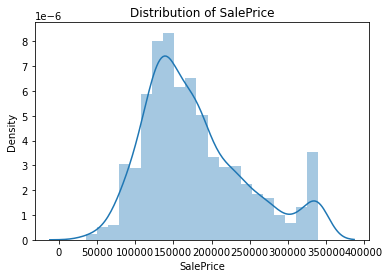

In [33]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(y)
plt.show()

Here the feature doesn't seem like it is normally distributed. Hence transforming the variable and checking again

In [34]:
y = np.log(y)

In [35]:
# dividing the dataset as required for the analysis 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# ANALYSIS

In [36]:
scaler = StandardScaler()

In [37]:
X_train.shape

(1022, 250)

In [38]:
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',"TotRmsAbvGrd","MoSold"]] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',"TotRmsAbvGrd","MoSold"]])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',"TotRmsAbvGrd","MoSold"]] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',"TotRmsAbvGrd","MoSold"]])

In [39]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
146    -0.632069    -1.053621 -1.015905    -0.811856     1.510535     1931.0   
1115   -0.872431     1.346062  0.649493     1.350742    -0.550569     2007.0   
758     2.492644    -2.396301 -2.088014     0.629876    -0.550569     1999.0   
280     0.089019     0.717574  0.426695     0.629876     0.479983     1989.0   
1340   -0.872431     0.031950 -0.408935    -1.532722    -0.550569     1971.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
146         1993.0   -0.676073   -0.548320  -0.133176    -0.854935 -0.799081   
1115        2007.0    1.740777    1.277719   0.385376     1.682144  1.535914   
758         1999.0    1.976568    0.232627  -0.853131    -0.782732 -1.119837   
280         1989.0    1.829199   -0.061376  -0.410972    -0.625876  0.016400   
1340        1971.0   -0.676073   -1.028372   0.681692    -0.498898 -0.807236   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
146  -0.793670  -1.334842      1.124728 -1.027835 -0.761259     -1.129389   
1115 -0.793670   0.455816      1.124728  0.811828 -0.761259      0.182988   
758   0.911320  -0.029892     -0.816947  0.811828  1.213378      0.182988   
280   1.055695   0.972793     -0.816947  0.811828  1.213378      0.182988   
1340 -0.793670  -1.341096     -0.816947 -1.027835 -0.761259      0.182988   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
146      -1.000236   -0.967059       1931.0         1.0   -1.458913   
1115      0.305308    0.586926       2007.0         3.0    2.217721   
758      -0.347464   -0.967059       1999.0         2.0   -0.180939   
280       0.305308    0.586926       1989.0         2.0    0.482625   
1340     -1.000236   -0.967059       1974.0         3.5    0.015673   

      WoodDeckSF  OpenPorchSF    MoSold  YrSold  MSZoning_FV  MSZoning_RH  \
146    -0.365588    -0.806496  1.716906  2009.0            0            0   
1115   -0.775496    -0.806496  1.716906  2007.0            0            0   
758    -0.775496    -0.806496  0.619089  2008.0            1            0   
280    -0.775496     0.791825 -1.942485  2007.0            0            0   
1340   -0.775496    -0.806496 -0.112789  2007.0            0            0   

      MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Not_applicable  Alley_Pave  \
146             0            1            1                     1           0   
1115            1            0            1                     1           0   
758             0            0            1                     0           1   
280             1            0            1                     1           0   
1340            1            0            1                     1           0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
146              0             0             1                0   
1115             0             0             1                0   
758              0             0             1                0   
280              0             0             1                0   
1340             0             0             1                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
146                 0                1                 0                  0   
1115                0                1                 0                  0   
758                 0                1                 0                  0   
280                 0                1                 0                  0   
1340                0                1                 0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
146               0              0                 0              0   
1115              0              0                 1              0   
758               0              0                 1              0   
280               0              0        

In [40]:
#Using RFE to select important features. 

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
rfe = RFE(linear_reg, 150)
rfe = rfe.fit(X_train, y_train)

In [41]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 80),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 83),
 ('YearRemodAdd', False, 94),
 ('MasVnrArea', False, 44),
 ('BsmtFinSF1', False, 26),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 23),
 ('2ndFlrSF', False, 22),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 88),
 ('BedroomAbvGr', False, 69),
 ('TotRmsAbvGrd', False, 18),
 ('Fireplaces', False, 79),
 ('GarageYrBlt', False, 97),
 ('GarageCars', False, 61),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 12),
 ('OpenPorchSF', False, 9),
 ('MoSold', False, 89),
 ('YrSold', False, 92),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('Alley_Not_applicable', False, 63),
 ('Alley_Pave', False, 30),
 ('LotShape_IR2', False, 96),
 ('LotShape_IR3', True, 1),
 ('LotShape_Re

In [42]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'GarageArea',
       ...
       'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=150)

In [43]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'Alley_Not_applicable', 'Alley_Pave',
       'LotShape_IR2', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_FR2', 'LotConfig_Inside', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_PosA', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'Exteri

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
X_train_rfe = pd.DataFrame(X_train[col])

In [46]:
X_train_rfe.head()

MSSubClass   LotArea  OverallQual  OverallCond  BsmtUnfSF  TotalBsmtSF  \
146    -0.632069 -1.015905    -0.811856     1.510535  -0.133176    -0.854935   
1115   -0.872431  0.649493     1.350742    -0.550569   0.385376     1.682144   
758     2.492644 -2.088014     0.629876    -0.550569  -0.853131    -0.782732   
280     0.089019  0.426695     0.629876     0.479983  -0.410972    -0.625876   
1340   -0.872431 -0.408935    -1.532722    -0.550569   0.681692    -0.498898   

      GrLivArea  BsmtFullBath  FullBath  GarageArea  MSZoning_FV  MSZoning_RH  \
146   -1.334842      1.124728 -1.027835   -1.458913            0            0   
1115   0.455816      1.124728  0.811828    2.217721            0            0   
758   -0.029892     -0.816947  0.811828   -0.180939            1            0   
280    0.972793     -0.816947  0.811828    0.482625            0            0   
1340  -1.341096     -0.816947 -1.027835    0.015673            0            0   

      MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR3  LandContour_Low  \
146             0            1            1             0                0   
1115            1            0            1             0                0   
758             0            0            1             0                0   
280             1            0            1             0                0   
1340            1            0            1             0                0   

      Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR3  LandSlope_Mod  \
146                  0                  0              0              0   
1115                 0                  0              0              0   
758                  0                  0              0              0   
280                  0                  0              0              0   
1340                 0                  0              0              0   

      Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
146                      0                     0                     0   
1115                     0                     0                     0   
758                      0                     0                     0   
280                      0                     0                     0   
1340                     0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_NAmes  \
146                     0                     0                   0   
1115                    0                     0                   0   
758                     0                     0                   0   
280                     0                     0                   0   
1340                    0                     0                   1   

      Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
146                     0                     0                     0   
1115                    0                     1                     0   
758                     0                     0                     0   
280                     0                     0                     0   
1340                    0                     0                     0   

      Neighborhood_Somerst  Neighborhood_StoneBr  Condition1_Feedr  \
146                      0                     0                 0   
1115                     0                     0                 0   
758                      1                     0                 0   
280                      0                     0                 0   
1340                     0                     0                 0   

      Condition1_Norm  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
146                 1                0                0                0   
1115                1                0                0                0   
758                 1                0                0                0   
280                 1                0                0                0   
1340  

In [47]:
# predict
y_train_pred = linear_reg.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9502720007718874

In [48]:
y_test_pred = linear_reg.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8696283738528602

As it can be seen that the analysis is not working properly and also it seems that the model is overfitting the data. Now manually working on regression

In [49]:
# making a linear regression model with the help of selected columns given by the RFE
lm_2 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:56:53   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [50]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
123  GarageFinish_Not_applicable      inf
62            Exterior1st_CBlock      inf
72            Exterior2nd_CBlock      inf
131    GarageCond_Not_applicable      inf
93       BsmtQual_Not_applicable      inf
95       BsmtCond_Not_applicable      inf
126    GarageQual_Not_applicable      inf
97   BsmtFinType1_Not_applicable      inf
111               Electrical_Mix      inf
115              Functional_Maj2      inf
122    GarageType_Not_applicable      inf
133                GarageCond_TA  6205.02
129                GarageCond_Fa   178.87
128                GarageQual_TA   135.34
48               RoofStyle_Gable   110.03
50                 RoofStyle_Hip   101.59
149        SaleCondition_Partial    97.30
145                 SaleType_New    96.63
53              RoofMatl_CompShg    66.09
124                GarageQual_Fa    58.07
130                GarageCond_Gd    56.74
12                   MSZoning_RL    52.75
78           Exterior2nd_VinylSd    46.43
13                   MSZoning_RM    38.25
67           Exterior1st_VinylSd    35.56
132                GarageCond_Po    35.37
57              RoofMatl_Tar&Grv    34.43
101  BsmtFinType2_Not_applicable    28.76
96   BsmtExposure_Not_applicable    27.70
82               MasVnrType_None    26.42
73           Exterior2nd_CmentBd    24.20
81            MasVnrType_BrkFace    24.16
63           Exterior1st_CemntBd    22.82
86                  ExterQual_TA    17.13
10                   MSZoning_FV    16.13
59              RoofMatl_WdShngl    15.76
58              RoofMatl_WdShake    13.49
125                GarageQual_Gd    12.72
85                  ExterQual_Gd    12.60
79           Exterior2nd_Wd Sdng    12.07
114               KitchenQual_TA    10.44
83              MasVnrType_Stone    10.20
74           Exterior2nd_HdBoard     9.62
65           Exterior1st_MetalSd     8.78
127                GarageQual_Po     8.63
113               KitchenQual_Gd     7.94
68           Exterior1st_Wd Sdng     7.89
76           Exterior2nd_Plywood     7.52
0                     MSSubClass     6.97
89              Foundation_PConc     6.75
103                 Heating_GasA     6.42
77            Exterior2nd_Stucco     6.23
5                    TotalBsmtSF     6.19
6                      GrLivArea     5.72
66            Exterior1st_Stucco     5.54
88             Foundation_CBlock     5.54
49             RoofStyle_Gambrel     5.53
11                   MSZoning_RH     5.28
104                 Heating_GasW     5.24
54              RoofMatl_Membran     5.08
55                RoofMatl_Metal     4.93
2                    OverallQual     4.83
30          Neighborhood_Somerst     4.83
45             HouseStyle_2Story     4.57
51             RoofStyle_Mansard     4.52
33               Condition1_Norm     4.40
52                RoofStyle_Shed     4.11
56                 RoofMatl_Roll     4.04
94                   BsmtQual_TA     3.38
9                     GarageArea     3.27
80           Exterior2nd_Wd Shng     3.22
41               BldgType_2fmCon     3.13
137                    PoolQC_Gd     3.10
42               BldgType_TwnhsE     3.09
71           Exterior2nd_BrkFace     2.99
1                        LotArea     2.95
84                  ExterQual_Fa     2.95
61           Exterior1st_BrkFace     2.94
40               Condition2_RRAe     2.92
4                      BsmtUnfSF     2.90
29          Neighborhood_OldTown     2.89
32              Condition1_Feedr     2.88
8                       FullBath     2.86
112               KitchenQual_Fa     2.68
119               Functional_Typ     2.46
7                   BsmtFullBath     2.44
136                    PoolQC_Fa     2.35
135                 PavedDrive_Y     2.33
109                 HeatingQC_TA     2.33
110                 CentralAir_Y     2.29
148         SaleCondition_Normal     2.23
140             MiscFeature_TenC     2.22
26            Neighborhood_NAmes     2.15
16               LandContour_Low     2.10
69           Exterior1st_WdShing  

In [51]:
X_train_rfe = X_train_rfe.drop(["GarageQual_Not_applicable","Exterior2nd_CBlock","Functional_Maj2","BsmtCond_Not_applicable","BsmtQual_Not_applicable","GarageType_Not_applicable","GarageFinish_Not_applicable","BsmtFinType1_Not_applicable","Electrical_Mix","Exterior1st_CBlock","GarageCond_Not_applicable","GarageCond_TA"],axis = 1)

In [52]:
X_train_rfe.shape

(1022, 138)

In [53]:
# making a linear regression model with the help of selected columns given by the RFE
lm_3 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:56:57   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [54]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
53              RoofMatl_CompShg  1105.57
48               RoofStyle_Gable   396.34
14                   Street_Pave   270.71
98                  Heating_GasA   256.27
12                   MSZoning_RL   238.20
38               Condition2_Norm   211.46
137        SaleCondition_Partial   105.16
133                 SaleType_New   104.47
50                 RoofStyle_Hip   103.80
76           Exterior2nd_VinylSd    69.67
80               MasVnrType_None    62.18
66           Exterior1st_VinylSd    54.54
84                  ExterQual_TA    45.36
13                   MSZoning_RM    43.43
118                GarageQual_TA    42.44
79            MasVnrType_BrkFace    34.19
112               Functional_Typ    33.62
105                 CentralAir_Y    32.83
33               Condition1_Norm    30.22
123                 PavedDrive_Y    29.30
71           Exterior2nd_CmentBd    25.06
62           Exterior1st_CemntBd    23.66
108               KitchenQual_TA    20.79
83                  ExterQual_Gd    18.48
10                   MSZoning_FV    16.23
92   BsmtExposure_Not_applicable    15.34
96   BsmtFinType2_Not_applicable    14.96
77           Exterior2nd_Wd Sdng    13.69
136         SaleCondition_Normal    13.09
107               KitchenQual_Gd    12.79
87              Foundation_PConc    12.02
85                  ExterCond_TA    10.98
72           Exterior2nd_HdBoard    10.87
81              MasVnrType_Stone    10.83
57              RoofMatl_Tar&Grv    10.00
86             Foundation_CBlock     9.77
64           Exterior1st_MetalSd     9.67
67           Exterior1st_Wd Sdng     9.10
74           Exterior2nd_Plywood     8.16
126         Fence_Not_applicable     7.20
0                     MSSubClass     6.91
59              RoofMatl_WdShngl     6.59
45             HouseStyle_2Story     6.44
75            Exterior2nd_Stucco     6.32
58              RoofMatl_WdShake     6.13
91                   BsmtQual_TA     6.08
5                    TotalBsmtSF     6.07
65            Exterior1st_Stucco     5.61
6                      GrLivArea     5.59
11                   MSZoning_RH     5.19
30          Neighborhood_Somerst     5.10
99                  Heating_GasW     4.98
2                    OverallQual     4.81
49             RoofStyle_Gambrel     4.67
51             RoofStyle_Mansard     3.97
52                RoofStyle_Shed     3.95
121                GarageCond_Po     3.81
117                GarageQual_Po     3.50
114   FireplaceQu_Not_applicable     3.34
104                 HeatingQC_TA     3.30
42               BldgType_TwnhsE     3.30
78           Exterior2nd_Wd Shng     3.24
9                     GarageArea     3.20
115                GarageQual_Fa     3.18
41               BldgType_2fmCon     3.17
70           Exterior2nd_BrkFace     3.03
29          Neighborhood_OldTown     3.02
61           Exterior1st_BrkFace     2.97
1                        LotArea     2.93
32              Condition1_Feedr     2.91
40               Condition2_RRAe     2.89
4                      BsmtUnfSF     2.88
8                       FullBath     2.85
106               KitchenQual_Fa     2.70
82                  ExterQual_Fa     2.69
26            Neighborhood_NAmes     2.55
7                   BsmtFullBath     2.41
124                    PoolQC_Fa     2.35
54              RoofMatl_Membran     2.33
128             MiscFeature_TenC     2.22
56                 RoofMatl_Roll     2.22
16               LandContour_Low     2.14
55                RoofMatl_Metal     2.13
68           Exterior1st_WdShing     2.09
28          Neighborhood_NridgHt     2.07
36               Condition1_RRAn     2.06
109              Functional_Min2     2.04
24           Neighborhood_IDOTRR     2.01
47               HouseStyle_SLvl     2.01
101                 Heating_Wall     1.99
125                    PoolQC_Gd     1.97
21          Neighborhood_ClearCr     1.96
102                 HeatingQC_Fa     1.93
44             HouseStyle_2.5Unf     1.93
103                 HeatingQC_Gd  

In [55]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_CompShg","ExterCond_TA","Condition2_Norm","Heating_GasA","GarageQual_TA","MSZoning_RL","TotalBsmtSF","GrLivArea","SaleCondition_Partial"],axis = 1)

In [56]:
# making a linear regression model with the help of selected columns given by the RFE
lm_4 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:57:00   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [57]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
44               RoofStyle_Gable  248.17
11                   Street_Pave  209.54
71           Exterior2nd_VinylSd   68.47
46                 RoofStyle_Hip   65.12
75               MasVnrType_None   58.32
61           Exterior1st_VinylSd   54.36
79                  ExterQual_TA   43.66
105               Functional_Typ   32.62
74            MasVnrType_BrkFace   32.12
98                  CentralAir_Y   30.21
30               Condition1_Norm   28.53
115                 PavedDrive_Y   27.61
66           Exterior2nd_CmentBd   24.72
57           Exterior1st_CemntBd   23.62
101               KitchenQual_TA   20.18
78                  ExterQual_Gd   17.75
86   BsmtExposure_Not_applicable   15.05
90   BsmtFinType2_Not_applicable   14.89
72           Exterior2nd_Wd Sdng   13.33
128         SaleCondition_Normal   12.61
100               KitchenQual_Gd   12.37
81              Foundation_PConc   11.54
76              MasVnrType_Stone   10.28
67           Exterior2nd_HdBoard   10.14
80             Foundation_CBlock    9.37
62           Exterior1st_Wd Sdng    9.04
59           Exterior1st_MetalSd    9.04
69           Exterior2nd_Plywood    7.69
118         Fence_Not_applicable    7.03
0                     MSSubClass    6.66
70            Exterior2nd_Stucco    6.25
85                   BsmtQual_TA    5.95
60            Exterior1st_Stucco    5.58
27          Neighborhood_Somerst    5.04
8                    MSZoning_FV    4.62
2                    OverallQual    4.48
41             HouseStyle_2Story    4.39
52              RoofMatl_Tar&Grv    3.74
48                RoofStyle_Shed    3.59
10                   MSZoning_RM    3.52
113                GarageCond_Po    3.48
110                GarageQual_Po    3.37
45             RoofStyle_Gambrel    3.29
97                  HeatingQC_TA    3.25
38               BldgType_TwnhsE    3.17
73           Exterior2nd_Wd Shng    3.16
107   FireplaceQu_Not_applicable    3.12
37               BldgType_2fmCon    3.10
65           Exterior2nd_BrkFace    2.97
47             RoofStyle_Mansard    2.97
26          Neighborhood_OldTown    2.92
56           Exterior1st_BrkFace    2.90
29              Condition1_Feedr    2.85
125                 SaleType_New    2.74
1                        LotArea    2.70
36               Condition2_RRAe    2.67
99                KitchenQual_Fa    2.63
77                  ExterQual_Fa    2.53
23            Neighborhood_NAmes    2.51
6                       FullBath    2.47
116                    PoolQC_Fa    2.34
7                     GarageArea    2.33
4                      BsmtUnfSF    2.30
120             MiscFeature_TenC    2.21
63           Exterior1st_WdShing    2.07
13               LandContour_Low    2.05
102              Functional_Min2    2.03
25          Neighborhood_NridgHt    2.01
5                   BsmtFullBath    1.95
43               HouseStyle_SLvl    1.92
96                  HeatingQC_Gd    1.89
18          Neighborhood_ClearCr    1.88
108                GarageQual_Fa    1.87
33               Condition1_RRAn    1.86
95                  HeatingQC_Fa    1.80
40             HouseStyle_2.5Unf    1.74
68           Exterior2nd_ImStucc    1.74
31               Condition1_PosN    1.71
21           Neighborhood_IDOTRR    1.70
3                    OverallCond    1.70
111                GarageCond_Fa    1.68
49              RoofMatl_Membran    1.68
103               Functional_Mod    1.66
114                 PavedDrive_P    1.65
24           Neighborhood_NWAmes    1.65
84                   BsmtQual_Fa    1.64
22          Neighborhood_MeadowV    1.62
53              RoofMatl_WdShake    1.60
20          Neighborhood_Edwards    1.58
92                  Heating_GasW    1.54
19          Neighborhood_Crawfor    1.53
93                  Heating_OthW    1.52
34               Condition1_RRNn    1.50
64           Exterior2nd_Brk Cmn    1.50
42             HouseStyle_SFoyer    1.48
17                 LandSlope_Mod    1.48
82              Foundation_Stone    1.46
50    

In [58]:
X_train_rfe = X_train_rfe.drop(["OverallQual","OverallCond","MasVnrType_None","Exterior2nd_VinylSd",
                                "Exterior1st_VinylSd","GarageArea"], axis = 1)

In [59]:
X_train_rfe.shape

(1022, 123)

In [60]:
# making a linear regression model with the help of selected columns given by the RFE
lm_5 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:57:03   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [61]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
41               RoofStyle_Gable  223.24
8                    Street_Pave  198.72
43                 RoofStyle_Hip   58.91
73                  ExterQual_TA   41.08
99                Functional_Typ   30.90
92                  CentralAir_Y   28.74
27               Condition1_Norm   28.24
109                 PavedDrive_Y   26.48
62           Exterior2nd_CmentBd   23.37
54           Exterior1st_CemntBd   23.02
95                KitchenQual_TA   19.14
72                  ExterQual_Gd   17.31
80   BsmtExposure_Not_applicable   15.00
84   BsmtFinType2_Not_applicable   14.83
122         SaleCondition_Normal   12.27
94                KitchenQual_Gd   12.11
75              Foundation_PConc   11.24
74             Foundation_CBlock    9.25
67           Exterior2nd_Wd Sdng    8.39
58           Exterior1st_Wd Sdng    8.05
112         Fence_Not_applicable    6.94
0                     MSSubClass    6.55
79                   BsmtQual_TA    5.71
66            Exterior2nd_Stucco    5.47
57            Exterior1st_Stucco    5.20
24          Neighborhood_Somerst    4.98
5                    MSZoning_FV    4.61
38             HouseStyle_2Story    4.24
45                RoofStyle_Shed    3.53
7                    MSZoning_RM    3.46
49              RoofMatl_Tar&Grv    3.45
107                GarageCond_Po    3.39
104                GarageQual_Po    3.34
91                  HeatingQC_TA    3.18
35               BldgType_TwnhsE    3.13
34               BldgType_2fmCon    3.07
42             RoofStyle_Gambrel    3.04
101   FireplaceQu_Not_applicable    2.92
23          Neighborhood_OldTown    2.90
26              Condition1_Feedr    2.81
44             RoofStyle_Mansard    2.80
53           Exterior1st_BrkFace    2.77
119                 SaleType_New    2.69
33               Condition2_RRAe    2.67
1                        LotArea    2.53
93                KitchenQual_Fa    2.50
20            Neighborhood_NAmes    2.50
4                       FullBath    2.40
71                  ExterQual_Fa    2.39
61           Exterior2nd_BrkFace    2.36
69            MasVnrType_BrkFace    2.34
110                    PoolQC_Fa    2.34
63           Exterior2nd_HdBoard    2.25
2                      BsmtUnfSF    2.23
65           Exterior2nd_Plywood    2.20
114             MiscFeature_TenC    2.20
68           Exterior2nd_Wd Shng    2.11
10               LandContour_Low    2.02
56           Exterior1st_MetalSd    2.01
22          Neighborhood_NridgHt    1.96
96               Functional_Min2    1.95
59           Exterior1st_WdShing    1.94
70              MasVnrType_Stone    1.92
3                   BsmtFullBath    1.90
40               HouseStyle_SLvl    1.89
90                  HeatingQC_Gd    1.88
15          Neighborhood_ClearCr    1.87
30               Condition1_RRAn    1.85
102                GarageQual_Fa    1.85
89                  HeatingQC_Fa    1.76
37             HouseStyle_2.5Unf    1.71
28               Condition1_PosN    1.70
18           Neighborhood_IDOTRR    1.69
105                GarageCond_Fa    1.67
97                Functional_Mod    1.63
46              RoofMatl_Membran    1.63
108                 PavedDrive_P    1.63
21           Neighborhood_NWAmes    1.61
78                   BsmtQual_Fa    1.60
19          Neighborhood_MeadowV    1.59
50              RoofMatl_WdShake    1.59
17          Neighborhood_Edwards    1.55
86                  Heating_GasW    1.53
87                  Heating_OthW    1.47
14                 LandSlope_Mod    1.47
39             HouseStyle_SFoyer    1.46
31               Condition1_RRNn    1.45
16          Neighborhood_Crawfor    1.45
111                    PoolQC_Gd    1.44
76              Foundation_Stone    1.44
88                  Heating_Wall    1.43
64           Exterior2nd_ImStucc    1.40
47                RoofMatl_Metal    1.40
29               Condition1_RRAe    1.40
12             LotConfig_CulDSac    1.40
103                GarageQual_Gd    1.39
106                GarageCond_Gd    1.39
83    

In [62]:
X_train_rfe = X_train_rfe.drop(["MSSubClass","CentralAir_Y","Exterior1st_MetalSd",
                                "PavedDrive_Y","FullBath","LotArea", "Exterior2nd_CmentBd","Exterior1st_CemntBd",
                               "Functional_Typ","Condition1_Norm","BsmtExposure_Not_applicable","BsmtFinType2_Not_applicable"], axis = 1)

In [63]:
X_train_rfe.shape

(1022, 111)

In [64]:
# making a linear regression model with the help of selected columns given by the RFE
lm_6 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:57:05   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [65]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5                   Street_Pave  188.12
37              RoofStyle_Gable  180.54
39                RoofStyle_Hip   47.61
66                 ExterQual_TA   39.77
85               KitchenQual_TA   18.57
65                 ExterQual_Gd   16.81
110        SaleCondition_Normal   12.03
84               KitchenQual_Gd   11.73
68             Foundation_PConc    9.76
67            Foundation_CBlock    8.18
60          Exterior2nd_Wd Sdng    7.61
52          Exterior1st_Wd Sdng    7.44
100        Fence_Not_applicable    6.72
21         Neighborhood_Somerst    4.96
72                  BsmtQual_TA    4.88
59           Exterior2nd_Stucco    4.88
2                   MSZoning_FV    4.53
51           Exterior1st_Stucco    4.51
41               RoofStyle_Shed    3.40
96                GarageCond_Po    3.32
93                GarageQual_Po    3.29
82                 HeatingQC_TA    3.08
45             RoofMatl_Tar&Grv    3.07
4                   MSZoning_RM    2.93
90   FireplaceQu_Not_applicable    2.78
38            RoofStyle_Gambrel    2.70
20         Neighborhood_OldTown    2.67
49          Exterior1st_BrkFace    2.65
107                SaleType_New    2.61
29              Condition2_RRAe    2.60
40            RoofStyle_Mansard    2.59
83               KitchenQual_Fa    2.44
17           Neighborhood_NAmes    2.37
98                    PoolQC_Fa    2.33
34            HouseStyle_2Story    2.29
64                 ExterQual_Fa    2.28
62           MasVnrType_BrkFace    2.26
55          Exterior2nd_BrkFace    2.26
102            MiscFeature_TenC    2.18
61          Exterior2nd_Wd Shng    2.01
0                     BsmtUnfSF    1.96
7               LandContour_Low    1.94
56          Exterior2nd_HdBoard    1.92
58          Exterior2nd_Plywood    1.91
53          Exterior1st_WdShing    1.88
63             MasVnrType_Stone    1.88
19         Neighborhood_NridgHt    1.87
81                 HeatingQC_Gd    1.86
12         Neighborhood_ClearCr    1.84
91                GarageQual_Fa    1.82
1                  BsmtFullBath    1.76
80                 HeatingQC_Fa    1.65
33            HouseStyle_2.5Unf    1.62
94                GarageCond_Fa    1.60
15          Neighborhood_IDOTRR    1.58
42             RoofMatl_Membran    1.57
46             RoofMatl_WdShake    1.57
18          Neighborhood_NWAmes    1.54
71                  BsmtQual_Fa    1.51
14         Neighborhood_Edwards    1.51
31              BldgType_TwnhsE    1.48
77                 Heating_GasW    1.46
78                 Heating_OthW    1.45
11                LandSlope_Mod    1.42
99                    PoolQC_Gd    1.42
30              BldgType_2fmCon    1.42
13         Neighborhood_Crawfor    1.40
69             Foundation_Stone    1.40
57          Exterior2nd_ImStucc    1.39
92                GarageQual_Gd    1.37
95                GarageCond_Gd    1.37
27              Condition1_RRNn    1.35
43               RoofMatl_Metal    1.35
9             LotConfig_CulDSac    1.33
36              HouseStyle_SLvl    1.33
50          Exterior1st_ImStucc    1.30
75             BsmtFinType2_LwQ    1.29
87               Functional_Mod    1.29
97                 PavedDrive_P    1.29
76             BsmtFinType2_Rec    1.29
79                 Heating_Wall    1.28
74             BsmtFinType2_GLQ    1.27
24              Condition1_PosN    1.26
23             Condition1_Feedr    1.25
89               FireplaceQu_Fa    1.25
101            MiscFeature_Othr    1.24
22         Neighborhood_StoneBr    1.23
35            HouseStyle_SFoyer    1.22
16         Neighborhood_MeadowV    1.22
26              Condition1_RRAn    1.21
105              SaleType_ConLD    1.21
88               Functional_Sev    1.20
86              Functional_Min2    1.20
54          Exterior2nd_Brk Cmn    1.19
32            HouseStyle_2.5Fin    1.19
3                   MSZoning_RH    1.18
47             RoofMatl_WdShngl    1.18
6                  LotShape_IR3    1.17
73             BsmtFinType2_BLQ    1.16
28              Conditi

In [66]:
X_train_rfe = X_train_rfe.drop(["ExterQual_TA","KitchenQual_TA","ExterQual_Gd","KitchenQual_Gd",
                                "SaleCondition_Normal","BsmtUnfSF","BsmtQual_TA",
                               "Exterior1st_Wd Sdng","Exterior2nd_Wd Sdng"], axis = 1)

In [67]:
X_train_rfe.shape

(1022, 102)

In [68]:
# making a linear regression model with the help of selected columns given by the RFE
lm_7 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:57:07   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [69]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4                   Street_Pave  183.50
36              RoofStyle_Gable  154.12
38                RoofStyle_Hip   41.42
63             Foundation_PConc    8.81
62            Foundation_CBlock    7.61
92         Fence_Not_applicable    6.53
20         Neighborhood_Somerst    4.85
57           Exterior2nd_Stucco    4.72
1                   MSZoning_FV    4.44
50           Exterior1st_Stucco    4.37
88                GarageCond_Po    3.31
40               RoofStyle_Shed    3.31
85                GarageQual_Po    3.27
44             RoofMatl_Tar&Grv    2.84
3                   MSZoning_RM    2.83
76                 HeatingQC_TA    2.74
82   FireplaceQu_Not_applicable    2.68
19         Neighborhood_OldTown    2.60
28              Condition2_RRAe    2.56
37            RoofStyle_Gambrel    2.43
39            RoofStyle_Mansard    2.39
90                    PoolQC_Fa    2.31
16           Neighborhood_NAmes    2.19
94             MiscFeature_TenC    2.17
48          Exterior1st_BrkFace    2.16
59           MasVnrType_BrkFace    2.15
33            HouseStyle_2Story    2.05
53          Exterior2nd_BrkFace    2.01
6               LandContour_Low    1.93
75                 HeatingQC_Gd    1.81
60             MasVnrType_Stone    1.81
11         Neighborhood_ClearCr    1.78
83                GarageQual_Fa    1.76
54          Exterior2nd_HdBoard    1.74
51          Exterior1st_WdShing    1.72
56          Exterior2nd_Plywood    1.69
58          Exterior2nd_Wd Shng    1.67
32            HouseStyle_2.5Unf    1.61
18         Neighborhood_NridgHt    1.61
74                 HeatingQC_Fa    1.59
86                GarageCond_Fa    1.58
61                 ExterQual_Fa    1.57
99                 SaleType_New    1.56
14          Neighborhood_IDOTRR    1.56
41             RoofMatl_Membran    1.53
45             RoofMatl_WdShake    1.53
17          Neighborhood_NWAmes    1.51
13         Neighborhood_Edwards    1.48
77               KitchenQual_Fa    1.47
71                 Heating_GasW    1.43
30              BldgType_TwnhsE    1.43
72                 Heating_OthW    1.42
29              BldgType_2fmCon    1.40
91                    PoolQC_Gd    1.40
10                LandSlope_Mod    1.39
64             Foundation_Stone    1.38
84                GarageQual_Gd    1.37
87                GarageCond_Gd    1.36
26              Condition1_RRNn    1.34
55          Exterior2nd_ImStucc    1.34
12         Neighborhood_Crawfor    1.34
66                  BsmtQual_Fa    1.33
0                  BsmtFullBath    1.32
8             LotConfig_CulDSac    1.32
42               RoofMatl_Metal    1.30
49          Exterior1st_ImStucc    1.28
35              HouseStyle_SLvl    1.28
70             BsmtFinType2_Rec    1.27
79               Functional_Mod    1.26
89                 PavedDrive_P    1.26
69             BsmtFinType2_LwQ    1.26
68             BsmtFinType2_GLQ    1.26
22             Condition1_Feedr    1.24
81               FireplaceQu_Fa    1.24
23              Condition1_PosN    1.24
73                 Heating_Wall    1.22
93             MiscFeature_Othr    1.21
97               SaleType_ConLD    1.20
25              Condition1_RRAn    1.20
15         Neighborhood_MeadowV    1.20
21         Neighborhood_StoneBr    1.18
52          Exterior2nd_Brk Cmn    1.18
80               Functional_Sev    1.18
34            HouseStyle_SFoyer    1.18
78              Functional_Min2    1.17
5                  LotShape_IR3    1.17
2                   MSZoning_RH    1.16
31            HouseStyle_2.5Fin    1.15
46             RoofMatl_WdShngl    1.14
67             BsmtFinType2_BLQ    1.14
27              Condition2_PosN    1.13
43                RoofMatl_Roll    1.11
7              Utilities_NoSeWa    1.09
24              Condition1_RRAe    1.09
101       SaleCondition_AdjLand    1.09
65              Foundation_Wood    1.08
9                 LotConfig_FR3    1.07
95                 SaleType_CWD    1.07
96                 SaleType_Con    1.07
98               SaleTy

In [70]:
X_train_rfe = X_train_rfe.drop(["Street_Pave","RoofStyle_Gable","RoofStyle_Hip","Foundation_PConc","Foundation_CBlock","Fence_Not_applicable"], axis = 1)

In [71]:
X_train_rfe.shape

(1022, 96)

In [72]:
# making a linear regression model with the help of selected columns given by the RFE
lm_8 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:57:08   Log-Likelihood:                 1007.6
No. Observations:                1022   AIC:                            -1729.
Df Residuals:                     879   BIC:                            -1024.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MSSubClass        

In [73]:
# Calculating the VIF for the variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
19        Neighborhood_Somerst  4.73
54          Exterior2nd_Stucco  4.62
1                  MSZoning_FV  4.42
47          Exterior1st_Stucco  4.32
83               GarageCond_Po  3.29
80               GarageQual_Po  3.23
37              RoofStyle_Shed  2.93
3                  MSZoning_RM  2.70
27             Condition2_RRAe  2.53
18        Neighborhood_OldTown  2.50
71                HeatingQC_TA  2.39
85                   PoolQC_Fa  2.30
88            MiscFeature_TenC  2.17
77  FireplaceQu_Not_applicable  2.14
45         Exterior1st_BrkFace  2.13
50         Exterior2nd_BrkFace  1.98
5              LandContour_Low  1.91
15          Neighborhood_NAmes  1.79
56          MasVnrType_BrkFace  1.74
78               GarageQual_Fa  1.73
57            MasVnrType_Stone  1.72
48         Exterior1st_WdShing  1.72
10        Neighborhood_ClearCr  1.71
55         Exterior2nd_Wd Shng  1.67
51         Exterior2nd_HdBoard  1.67
70                HeatingQC_Gd  1.66
32           HouseStyle_2Story  1.65
53         Exterior2nd_Plywood  1.60
31           HouseStyle_2.5Unf  1.59
81               GarageCond_Fa  1.57
69                HeatingQC_Fa  1.54
17        Neighborhood_NridgHt  1.53
42            RoofMatl_WdShake  1.51
58                ExterQual_Fa  1.51
13         Neighborhood_IDOTRR  1.50
93                SaleType_New  1.50
72              KitchenQual_Fa  1.45
16         Neighborhood_NWAmes  1.45
41            RoofMatl_Tar&Grv  1.44
66                Heating_GasW  1.43
67                Heating_OthW  1.42
12        Neighborhood_Edwards  1.40
36           RoofStyle_Mansard  1.39
28             BldgType_2fmCon  1.39
86                   PoolQC_Gd  1.39
59            Foundation_Stone  1.37
29             BldgType_TwnhsE  1.37
79               GarageQual_Gd  1.36
9                LandSlope_Mod  1.36
82               GarageCond_Gd  1.35
38            RoofMatl_Membran  1.34
61                 BsmtQual_Fa  1.33
52         Exterior2nd_ImStucc  1.32
0                 BsmtFullBath  1.29
25             Condition1_RRNn  1.29
7            LotConfig_CulDSac  1.28
46         Exterior1st_ImStucc  1.27
65            BsmtFinType2_Rec  1.26
64            BsmtFinType2_LwQ  1.25
74              Functional_Mod  1.25
11        Neighborhood_Crawfor  1.24
84                PavedDrive_P  1.24
22             Condition1_PosN  1.24
63            BsmtFinType2_GLQ  1.23
34             HouseStyle_SLvl  1.23
21            Condition1_Feedr  1.21
76              FireplaceQu_Fa  1.21
87            MiscFeature_Othr  1.20
14        Neighborhood_MeadowV  1.19
68                Heating_Wall  1.18
91              SaleType_ConLD  1.18
24             Condition1_RRAn  1.18
75              Functional_Sev  1.18
20        Neighborhood_StoneBr  1.17
33           HouseStyle_SFoyer  1.17
49         Exterior2nd_Brk Cmn  1.16
73             Functional_Min2  1.16
2                  MSZoning_RH  1.15
4                 LotShape_IR3  1.15
43            RoofMatl_WdShngl  1.13
26             Condition2_PosN  1.13
30           HouseStyle_2.5Fin  1.13
39              RoofMatl_Metal  1.13
40               RoofMatl_Roll  1.11
62            BsmtFinType2_BLQ  1.10
35           RoofStyle_Gambrel  1.10
6             Utilities_NoSeWa  1.09
23             Condition1_RRAe  1.08
95       SaleCondition_AdjLand  1.08
89                SaleType_CWD  1.07
8                LotConfig_FR3  1.06
90                SaleType_Con  1.06
92              SaleType_ConLI  1.06
44         Exterior1st_AsphShn  1.03
60             Foundation_Wood  1.03
94                SaleType_Oth  1.02

In [74]:
# predict
y_train_pred = lm_8.predict(X_train_rfe)
r2_score(y_true=y_train, y_pred=y_train_pred)

-121.67476760854449

As it can be seen that the issue still persists even after trying soo many times. Hence trying some new methods. 

# Lasso regression

In [75]:
# Applying Lasso

# list of alphas to tune
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.061036      0.028908         0.003192        0.001163      0.0001   
1       0.012766      0.001163         0.002593        0.000489       0.001   
2       0.007779      0.000399         0.002394        0.000489        0.01   
3       0.008379      0.001019         0.002591        0.000491        0.05   
4       0.007779      0.001163         0.002793        0.000399         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.094008          -0.084287          -0.086020   
1   {'alpha': 0.001}          -0.092572          -0.076800          -0.081233   
2    {'alpha': 0.01}          -0.102739          -0.089690          -0.092984   
3    {'alpha': 0.05}          -0.122692          -0.121117          -0.117640   
4     {'alpha': 0.1}          -0.165107          -0.170231          -0.157947   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.082225          -0.081147        -0.085538        0.004556   
1          -0.082943          -0.076940        -0.082098        0.005759   
2          -0.092942          -0.077943        -0.091260        0.007967   
3          -0.121677          -0.110383        -0.118702        0.004493   
4          -0.167294          -0.148025        -0.161721        0.007959   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.060818           -0.064160   
1                1           -0.070364           -0.075105   
2                3           -0.085970           -0.089935   
3                4           -0.114694           -0.116177   
4                5           -0.158896           -0.161918   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.061347           -0.064684           -0.064789   
1           -0.073452           -0.073503           -0.075102   
2           -0.088658           -0.089377           -0.092597   
3           -0.117444           -0.117932           -0.118772   
4           -0.160469           -0.160161           -0.160536   

   mean_train_score  std_train_score  
0         -0.063160         0.001717  
1         -0.073505         0.001731  
2         -0.089307         0.002135  
3         -0.117004         0.001428  
4         -0.160396         0.000964

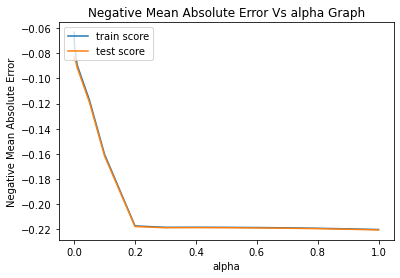

In [77]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error Vs alpha Graph")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [78]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9184064813862595
0.8905863401422486


In [79]:
# lasso model parameters
model_parameters = list(lm.coef_ )
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 5) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model = list(zip(cols, model_parameters))

In [80]:
#Checking for different alpha values
alpha_val = [0.0001,0.001,0.01,0.1,1,1.1]
for i in alpha_val:
    lm_lasso = Lasso(alpha=i)
    lm_lasso.fit(X_train, y_train)
    y_train_pred = lm_lasso.predict(X_train)
    print(r2_score(y_true=y_train, y_pred=y_train_pred))
    y_test_pred = lm_lasso.predict(X_test)
    print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9429151041409831
0.8826982787779355
0.9184064813862595
0.8905863401422486
0.8796174751518759
0.8617486499166409
0.6850002609912484
0.6503806774306895
0.42608798448526053
0.39594840648845464
0.42253785132001886
0.39333455510196114


In [81]:
#creating model with best alpha value
lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train, y_train)
y_train_pred = lm_lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9184064813862595
0.8905863401422486


In [82]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-3.71761471e-04,  5.36822489e-03,  2.78553103e-02,  7.89675572e-02,
        5.08663656e-02,  2.07559281e-03,  1.16680015e-03,  1.76583363e-04,
        0.00000000e+00, -1.54978418e-02,  4.74521491e-02,  0.00000000e+00,
        0.00000000e+00,  1.25351468e-01,  1.87269052e-02,  1.60594368e-03,
       -0.00000000e+00,  1.58038539e-03, -4.42358993e-03,  1.22635242e-02,
       -1.26926210e-04,  3.83022410e-02,  9.49422660e-03,  1.04190873e-02,
        6.87203278e-03,  2.27342539e-05, -4.38118809e-03,  3.05547486e-03,
        0.00000000e+00,  4.28656229e-02, -1.10321869e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.82464129e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.26725482e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.05431824e-02,  1.87329707e-02, -0.00000000e+00,
        1.07097768e-01, -

In [83]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 6) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 14.297624),
 ('BsmtFullBath', -0.000372),
 ('MSZoning_FV', 0.005368),
 ('MSZoning_RH', 0.027855),
 ('MSZoning_RM', 0.078968),
 ('LotShape_IR3', 0.050866),
 ('LandContour_Low', 0.002076),
 ('Utilities_NoSeWa', 0.001167),
 ('LotConfig_CulDSac', 0.000177),
 ('LotConfig_FR3', 0.0),
 ('LandSlope_Mod', -0.015498),
 ('Neighborhood_ClearCr', 0.047452),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', 0.0),
 ('Neighborhood_IDOTRR', 0.125351),
 ('Neighborhood_MeadowV', 0.018727),
 ('Neighborhood_NAmes', 0.001606),
 ('Neighborhood_NWAmes', -0.0),
 ('Neighborhood_NridgHt', 0.00158),
 ('Neighborhood_OldTown', -0.004424),
 ('Neighborhood_Somerst', 0.012264),
 ('Neighborhood_StoneBr', -0.000127),
 ('Condition1_Feedr', 0.038302),
 ('Condition1_PosN', 0.009494),
 ('Condition1_RRAe', 0.010419),
 ('Condition1_RRAn', 0.006872),
 ('Condition1_RRNn', 2.3e-05),
 ('Condition2_PosN', -0.004381),
 ('Condition2_RRAe', 0.003055),
 ('BldgType_2fmCon', 0.0),
 ('BldgType_TwnhsE', 0.042866),
 (

Hence the best value of alpha is 0.001 

In [84]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12874214914890852


This value is not so bad hence taking it as the final model 


In [85]:
# FINDING THE FEATURES AND THEIR COEEFICIENT GIVEN BY THE LASSO REGRESSION MODEL
model  = list(zip(cols, model_parameters))

In [86]:
#printing the predictive variables along with their coefficients
col_coeff = pd.DataFrame(model)
col_coeff.columns = ['Variable', 'Coeff']
col_coeff.head()

Variable      Coeff
0      constant  14.297624
1  BsmtFullBath  -0.000372
2   MSZoning_FV   0.005368
3   MSZoning_RH   0.027855
4   MSZoning_RM   0.078968

In [87]:
# sort the coefficients in ascending order
col_coeff = col_coeff.sort_values((['Coeff']), axis = 0, ascending = False)
col_coeff

Variable      Coeff
0                     constant  14.297624
14         Neighborhood_IDOTRR   0.125351
53         Exterior2nd_ImStucc   0.107098
68                Heating_OthW   0.084124
4                  MSZoning_RM   0.078968
5                 LotShape_IR3   0.050866
11        Neighborhood_ClearCr   0.047452
30             BldgType_TwnhsE   0.042866
73              KitchenQual_Fa   0.042275
22            Condition1_Feedr   0.038302
3                  MSZoning_RH   0.027855
46         Exterior1st_BrkFace   0.022673
63            BsmtFinType2_BLQ   0.022351
50         Exterior2nd_Brk Cmn   0.020543
51         Exterior2nd_BrkFace   0.018733
15        Neighborhood_MeadowV   0.018727
42            RoofMatl_Tar&Grv   0.018246
20        Neighborhood_Somerst   0.012264
24             Condition1_RRAe   0.010419
23             Condition1_PosN   0.009494
25             Condition1_RRAn   0.006872
2                  MSZoning_FV   0.005368
28             Condition2_RRAe   0.003055
6              LandContour_Low   0.002076
16          Neighborhood_NAmes   0.001606
18        Neighborhood_NridgHt   0.001580
7             Utilities_NoSeWa   0.001167
8            LotConfig_CulDSac   0.000177
26             Condition1_RRNn   0.000023
71                HeatingQC_Gd   0.000000
72                HeatingQC_TA  -0.000000
70                HeatingQC_Fa   0.000000
62                 BsmtQual_Fa  -0.000000
69                Heating_Wall   0.000000
67                Heating_GasW  -0.000000
74             Functional_Min2  -0.000000
65            BsmtFinType2_LwQ   0.000000
64            BsmtFinType2_GLQ  -0.000000
66            BsmtFinType2_Rec  -0.000000
84               GarageCond_Po  -0.000000
75              Functional_Mod   0.000000
85                PavedDrive_P  -0.000000
94                SaleType_New  -0.000000
93              SaleType_ConLI   0.000000
92              SaleType_ConLD   0.000000
91                SaleType_Con   0.000000
90                SaleType_CWD   0.000000
87                   PoolQC_Gd   0.000000
86                   PoolQC_Fa   0.000000
60            Foundation_Stone   0.000000
76              Functional_Sev  -0.000000
83               GarageCond_Gd  -0.000000
82               GarageCond_Fa   0.000000
81               GarageQual_Po   0.000000
80               GarageQual_Gd  -0.000000
79               GarageQual_Fa   0.000000
78  FireplaceQu_Not_applicable  -0.000000
77              FireplaceQu_Fa   0.000000
61             Foundation_Wood  -0.000000
48          Exterior1st_Stucco  -0.000000
59                ExterQual_Fa   0.000000
39            RoofMatl_Membran   0.000000
9                LotConfig_FR3   0.000000
12        Neighborhood_Crawfor   0.000000
13        Neighborhood_Edwards   0.000000
17         Neighborhood_NWAmes  -0.000000
29             BldgType_2fmCon   0.000000
32           HouseStyle_2.5Unf  -0.000000
33           HouseStyle_2Story  -0.000000
34           HouseStyle_SFoyer   0.000000
35             HouseStyle_SLvl   0.000000
58            MasVnrType_Stone  -0.000000
37           RoofStyle_Mansard  -0.000000
38              RoofStyle_Shed   0.000000
36           RoofStyle_Gambrel  -0.000000
40              RoofMatl_Metal  -0.000000
49         Exterior1st_WdShing  -0.000000
57          MasVnrType_BrkFace  -0.000000
55          Exterior2nd_Stucco  -0.000000
41               RoofMatl_Roll  -0.000000
52         Exterior2nd_HdBoard  -0.000000
96       SaleCondition_AdjLand   0.000000
47         Exterior1st_ImStucc   0.000000
45         Exterior1st_AsphShn  -0.000000
44            RoofMatl_WdShngl  -0.000000
43            RoofMatl_WdShake  -0.000000
21        Neighborhood_StoneBr  -0.000127
1                 BsmtFullBath  -0.000372
31           HouseStyle_2.5Fin  -0.001103
27             Condition2_PosN  -0.004381
19        Neighborhood_OldTown  -0.004424
95                SaleType_Oth  -0.011773
10               LandSlope_Mod  -0.015498
88            MiscFeature_Othr  -0.017963
56         Exterior2nd_Wd Shng  

In [88]:
# now removing all the features with 0 coefficients
col_coeff = pd.DataFrame(col_coeff[(col_coeff['Coeff'] != 0)])
col_coeff

Variable      Coeff
0               constant  14.297624
14   Neighborhood_IDOTRR   0.125351
53   Exterior2nd_ImStucc   0.107098
68          Heating_OthW   0.084124
4            MSZoning_RM   0.078968
5           LotShape_IR3   0.050866
11  Neighborhood_ClearCr   0.047452
30       BldgType_TwnhsE   0.042866
73        KitchenQual_Fa   0.042275
22      Condition1_Feedr   0.038302
3            MSZoning_RH   0.027855
46   Exterior1st_BrkFace   0.022673
63      BsmtFinType2_BLQ   0.022351
50   Exterior2nd_Brk Cmn   0.020543
51   Exterior2nd_BrkFace   0.018733
15  Neighborhood_MeadowV   0.018727
42      RoofMatl_Tar&Grv   0.018246
20  Neighborhood_Somerst   0.012264
24       Condition1_RRAe   0.010419
23       Condition1_PosN   0.009494
25       Condition1_RRAn   0.006872
2            MSZoning_FV   0.005368
28       Condition2_RRAe   0.003055
6        LandContour_Low   0.002076
16    Neighborhood_NAmes   0.001606
18  Neighborhood_NridgHt   0.001580
7       Utilities_NoSeWa   0.001167
8      LotConfig_CulDSac   0.000177
26       Condition1_RRNn   0.000023
21  Neighborhood_StoneBr  -0.000127
1           BsmtFullBath  -0.000372
31     HouseStyle_2.5Fin  -0.001103
27       Condition2_PosN  -0.004381
19  Neighborhood_OldTown  -0.004424
95          SaleType_Oth  -0.011773
10         LandSlope_Mod  -0.015498
88      MiscFeature_Othr  -0.017963
56   Exterior2nd_Wd Shng  -0.022737
54   Exterior2nd_Plywood  -0.034668
89      MiscFeature_TenC  -0.048795

# Ridge Regression

In [89]:
# Applying Ridge

# list of alphas to tune
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}
ridge_reg = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_reg, 
                        param_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']>=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
13       0.008577      0.002054         0.002992    1.092667e-03         1.0   
14       0.006782      0.000977         0.002992    9.536743e-08         2.0   
15       0.005585      0.000488         0.002194    3.989220e-04         3.0   
16       0.006383      0.001017         0.002992    3.504023e-07         4.0   
17       0.005984      0.000892         0.002792    3.989458e-04         5.0   

            params  split0_test_score  split1_test_score  split2_test_score  \
13  {'alpha': 1.0}          -0.101159          -0.082397          -0.088415   
14  {'alpha': 2.0}          -0.099812          -0.079478          -0.087889   
15  {'alpha': 3.0}          -0.098901          -0.078099          -0.087177   
16  {'alpha': 4.0}          -0.098276          -0.077238          -0.086516   
17  {'alpha': 5.0}          -0.097873          -0.076732          -0.085916   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
13          -0.084572          -0.083961        -0.088101        0.006823   
14          -0.083157          -0.083289        -0.086725        0.007066   
15          -0.082618          -0.082930        -0.085945        0.007087   
16          -0.082472          -0.082510        -0.085403        0.007079   
17          -0.082402          -0.082111        -0.085007        0.007071   

    rank_test_score  split0_train_score  split1_train_score  \
13               11           -0.060918           -0.064729   
14               10           -0.062080           -0.066751   
15                9           -0.062827           -0.067826   
16                8           -0.063396           -0.068573   
17                7           -0.063884           -0.069121   

    split2_train_score  split3_train_score  split4_train_score  \
13           -0.061353           -0.065199           -0.064997   
14           -0.063012           -0.066412           -0.066646   
15           -0.064063           -0.067156           -0.067621   
16           -0.064873           -0.067670           -0.068322   
17           -0.065519           -0.068071           -0.068866   

    mean_train_score  std_train_score  
13         -0.063439         0.001892  
14         -0.064980         0.002012  
15         -0.065898         0.002053  
16         -0.066567         0.002061  
17         -0.067092         0.002049

In [91]:
#Checking with different alpha values
alpha_val = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,12,13,14,15,20,25,30,35,40,45,50,60,70,80,90,100,110,120,130,140,150]
for i in alpha_val:
    print("Alpha_value ", i)
    lm_ridge = Ridge(alpha=i)
    lm_ridge.fit(X_train, y_train)
    y_train_pred = lm_ridge.predict(X_train)
    print(r2_score(y_true=y_train, y_pred=y_train_pred))
    y_test_pred = lm_ridge.predict(X_test)
    print(r2_score(y_true=y_test, y_pred=y_test_pred))

Alpha_value  0.0001
0.9502719745300405
0.8696509876832048
Alpha_value  0.001
0.9502695071945371
0.8698445220432398
Alpha_value  0.01
0.9501123854608522
0.8711340490370355
Alpha_value  0.1
0.9482655705499319
0.8757896620290847
Alpha_value  0.2
0.947161320696723
0.8790584733877783
Alpha_value  0.3
0.9463218751732919
0.8811761524891139
Alpha_value  0.4
0.9456069477778016
0.8826111087376826
Alpha_value  0.5
0.944975515671279
0.8836334669907592
Alpha_value  1
0.9425844967150966
0.8861433168117545
Alpha_value  1.5
0.940927441017017
0.8871906644752625
Alpha_value  2
0.9396638400991493
0.887808759985602
Alpha_value  2.5
0.9386406163800851
0.8882380482368888
Alpha_value  3
0.9377774134550789
0.8885611965168214
Alpha_value  3.5
0.9370276092713098
0.8888148912290993
Alpha_value  4
0.9363620846407087
0.8890186840411267
Alpha_value  4.5
0.9357615844352829
0.8891844672703448
Alpha_value  5
0.9352127819405188
0.8893201859757942
Alpha_value  5.5
0.9347061025930667
0.8894315095662171
Alpha_value  6
0.9

When the alpha value is 140 there is the least difference between the y test pred and y test and y train pred and y train

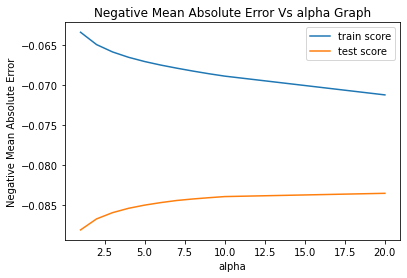

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error Vs alpha Graph")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [93]:
#creating model with best alpha value
lm_ridge = Ridge(alpha=140)
lm_ridge.fit(X_train, y_train)
y_train_pred = lm_ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9071422336952908
0.8806123823460039


In [94]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 140
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.64663216e-03,  9.12940730e-03,  2.64562124e-02,  6.49306209e-02,
        4.60214179e-02,  2.16043909e-03,  1.65645841e-03,  3.91050456e-03,
        1.49065534e-02, -1.17788036e-03,  3.44700446e-02,  3.08336525e-02,
        2.68091567e-02,  5.94704224e-02,  1.63068793e-02,  8.80641301e-03,
        8.10767292e-03,  6.48566598e-03,  6.87660328e-03,  1.91094317e-02,
       -3.20413428e-04,  2.20408050e-02,  2.01360981e-02,  9.97694048e-03,
        8.63603118e-03,  2.18421394e-03, -5.62746513e-03,  1.26234235e-02,
        3.42550317e-03,  1.59555842e-02, -1.62675897e-02,  9.41678659e-04,
       -2.36101138e-04,  3.78682492e-03,  4.81879038e-03, -7.93213424e-03,
       -3.41381576e-03,  4.83180901e-03,  1.06016070e-03, -5.73023753e-03,
       -9.05640755e-04,  1.10463855e-02, -2.56440839e-03, -2.66073742e-04,
       -1.37643839e-03,  1.14660094e-02, -1.80834543e-04, -2.03948857e-04,
       -3.35590133e-03,  8.15793551e-03,  8.69172571e-03, -6.89160690e-03,
        2.80727238e-02, -

In [95]:
# ridge model parameters
model_parameters = list(ridge.coef_ )
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 6) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 16.23647),
 ('BsmtFullBath', -0.006647),
 ('MSZoning_FV', 0.009129),
 ('MSZoning_RH', 0.026456),
 ('MSZoning_RM', 0.064931),
 ('LotShape_IR3', 0.046021),
 ('LandContour_Low', 0.00216),
 ('Utilities_NoSeWa', 0.001656),
 ('LotConfig_CulDSac', 0.003911),
 ('LotConfig_FR3', 0.014907),
 ('LandSlope_Mod', -0.001178),
 ('Neighborhood_ClearCr', 0.03447),
 ('Neighborhood_Crawfor', 0.030834),
 ('Neighborhood_Edwards', 0.026809),
 ('Neighborhood_IDOTRR', 0.05947),
 ('Neighborhood_MeadowV', 0.016307),
 ('Neighborhood_NAmes', 0.008806),
 ('Neighborhood_NWAmes', 0.008108),
 ('Neighborhood_NridgHt', 0.006486),
 ('Neighborhood_OldTown', 0.006877),
 ('Neighborhood_Somerst', 0.019109),
 ('Neighborhood_StoneBr', -0.00032),
 ('Condition1_Feedr', 0.022041),
 ('Condition1_PosN', 0.020136),
 ('Condition1_RRAe', 0.009977),
 ('Condition1_RRAn', 0.008636),
 ('Condition1_RRNn', 0.002184),
 ('Condition2_PosN', -0.005627),
 ('Condition2_RRAe', 0.012623),
 ('BldgType_2fmCon', 0.003426),
 ('BldgType_Tw

In [96]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13448214425087007


In [97]:
# FINDING THE FEATURES AND THEIR COEEFICIENT GIVEN BY THE ridge REGRESSION MODEL
model_ridge  = list(zip(cols, model_parameters))

In [98]:
#presenting ridge model features along with coefficients
col_coeff_ridge = pd.DataFrame(model)
col_coeff_ridge.columns = ['Variable', 'Coeff']
col_coeff_ridge.head()

Variable      Coeff
0      constant  14.297624
1  BsmtFullBath  -0.000372
2   MSZoning_FV   0.005368
3   MSZoning_RH   0.027855
4   MSZoning_RM   0.078968

In [99]:
# sort the coefficients in ascending order
col_coeff_ridge = col_coeff_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
col_coeff_ridge

Variable      Coeff
0                     constant  14.297624
14         Neighborhood_IDOTRR   0.125351
53         Exterior2nd_ImStucc   0.107098
68                Heating_OthW   0.084124
4                  MSZoning_RM   0.078968
5                 LotShape_IR3   0.050866
11        Neighborhood_ClearCr   0.047452
30             BldgType_TwnhsE   0.042866
73              KitchenQual_Fa   0.042275
22            Condition1_Feedr   0.038302
3                  MSZoning_RH   0.027855
46         Exterior1st_BrkFace   0.022673
63            BsmtFinType2_BLQ   0.022351
50         Exterior2nd_Brk Cmn   0.020543
51         Exterior2nd_BrkFace   0.018733
15        Neighborhood_MeadowV   0.018727
42            RoofMatl_Tar&Grv   0.018246
20        Neighborhood_Somerst   0.012264
24             Condition1_RRAe   0.010419
23             Condition1_PosN   0.009494
25             Condition1_RRAn   0.006872
2                  MSZoning_FV   0.005368
28             Condition2_RRAe   0.003055
6              LandContour_Low   0.002076
16          Neighborhood_NAmes   0.001606
18        Neighborhood_NridgHt   0.001580
7             Utilities_NoSeWa   0.001167
8            LotConfig_CulDSac   0.000177
26             Condition1_RRNn   0.000023
71                HeatingQC_Gd   0.000000
72                HeatingQC_TA  -0.000000
70                HeatingQC_Fa   0.000000
62                 BsmtQual_Fa  -0.000000
69                Heating_Wall   0.000000
67                Heating_GasW  -0.000000
74             Functional_Min2  -0.000000
65            BsmtFinType2_LwQ   0.000000
64            BsmtFinType2_GLQ  -0.000000
66            BsmtFinType2_Rec  -0.000000
84               GarageCond_Po  -0.000000
75              Functional_Mod   0.000000
85                PavedDrive_P  -0.000000
94                SaleType_New  -0.000000
93              SaleType_ConLI   0.000000
92              SaleType_ConLD   0.000000
91                SaleType_Con   0.000000
90                SaleType_CWD   0.000000
87                   PoolQC_Gd   0.000000
86                   PoolQC_Fa   0.000000
60            Foundation_Stone   0.000000
76              Functional_Sev  -0.000000
83               GarageCond_Gd  -0.000000
82               GarageCond_Fa   0.000000
81               GarageQual_Po   0.000000
80               GarageQual_Gd  -0.000000
79               GarageQual_Fa   0.000000
78  FireplaceQu_Not_applicable  -0.000000
77              FireplaceQu_Fa   0.000000
61             Foundation_Wood  -0.000000
48          Exterior1st_Stucco  -0.000000
59                ExterQual_Fa   0.000000
39            RoofMatl_Membran   0.000000
9                LotConfig_FR3   0.000000
12        Neighborhood_Crawfor   0.000000
13        Neighborhood_Edwards   0.000000
17         Neighborhood_NWAmes  -0.000000
29             BldgType_2fmCon   0.000000
32           HouseStyle_2.5Unf  -0.000000
33           HouseStyle_2Story  -0.000000
34           HouseStyle_SFoyer   0.000000
35             HouseStyle_SLvl   0.000000
58            MasVnrType_Stone  -0.000000
37           RoofStyle_Mansard  -0.000000
38              RoofStyle_Shed   0.000000
36           RoofStyle_Gambrel  -0.000000
40              RoofMatl_Metal  -0.000000
49         Exterior1st_WdShing  -0.000000
57          MasVnrType_BrkFace  -0.000000
55          Exterior2nd_Stucco  -0.000000
41               RoofMatl_Roll  -0.000000
52         Exterior2nd_HdBoard  -0.000000
96       SaleCondition_AdjLand   0.000000
47         Exterior1st_ImStucc   0.000000
45         Exterior1st_AsphShn  -0.000000
44            RoofMatl_WdShngl  -0.000000
43            RoofMatl_WdShake  -0.000000
21        Neighborhood_StoneBr  -0.000127
1                 BsmtFullBath  -0.000372
31           HouseStyle_2.5Fin  -0.001103
27             Condition2_PosN  -0.004381
19        Neighborhood_OldTown  -0.004424
95                SaleType_Oth  -0.011773
10               LandSlope_Mod  -0.015498
88            MiscFeature_Othr  -0.017963
56         Exterior2nd_Wd Shng  

It can be seen that both the ridge regression and lasso regression works the best in the given dataset but my personal preference will be towards lasso regression as it can make sure that the results are good.  And also it is very clear that the lasso regression makes sure that the unwanted features are also made zero making it better for understanding